In [1]:
# install.packages("sp")
# install.packages("rgdal")
# install.packages("rgeos")
# install.packages("tmap")
# install.packages("raster")
# install.packages("spdep")
# install.packages("gstat")
# install.packages("spgwr")
# install.packages("GWmodel")
# install.packages("regclass")
# install.packages("ggplot2")
# install.packages("ggcorrplot")
# install.packages("lmtest")
# install.packages("stringr")
# install.packages("leaflet")
# install.packages("extrafont") 

library(sp)
library(dplyr)
library(stringr)
library(rgeos)
library(tmap)
library(raster)
library(spdep)
library(gstat)
library(spgwr)
library(GWmodel)
library(regclass)
library(ggplot2)
library(ggcorrplot)
library(lmtest)
library(leaflet)
library(extrafont)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


rgeos version: 0.5-3, (SVN revision 634)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Linking to sp version: 1.4-2 
 Polygon checking: TRUE 



Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: sf

Linking to GEOS 3.8.0, GDAL 3.1.2, PROJ 6.1.0

NOTE: This package does not constitute approval of GWR
as a method of spatial analysis; see example(gwr)

Loading required package: maptools

Checking rgeos availability: TRUE

Loading required package: robustbase

Loading required package: Rcpp

Loading required package: spat

In [2]:
car_under20 <- read.csv("car_under20.csv", row.names = 1)
car_20 <- read.csv("car_20.csv", row.names = 1)
car_30 <- read.csv("car_30.csv", row.names = 1)
car_40 <- read.csv("car_40.csv", row.names = 1)
car_50 <- read.csv("car_50.csv", row.names = 1)
car_over60 <- read.csv("car_over60.csv", row.names = 1)

person_under20 <- read.csv("person_under20.csv", row.names = 1)
person_20 <- read.csv("person_20.csv", row.names = 1)
person_30 <- read.csv("person_30.csv", row.names = 1)
person_40 <- read.csv("person_40.csv", row.names = 1)
person_50 <- read.csv("person_50.csv", row.names = 1)
person_over60 <- read.csv("person_over60.csv", row.names = 1)

# <font color=blue>3. GWR 모델링</font>

#### 차대사람_60대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [3]:
mod_data2 <- person_over60 %>%
  dplyr::select(신호등_보행자수:총거주인구수, 차대사람..60대.이상) %>%
  mutate(평균혼잡강도=(혼잡빈도강도 + 혼잡시간강도)/2) %>%
  dplyr::select(-혼잡빈도강도, -혼잡시간강도, -이상최저온도동반사고건수, -이상최고온도동반사고건수, -이상평균지면온도동반사고건수)

mod_data3 <- sp::SpatialPointsDataFrame(data=mod_data2, coords = cbind(person_over60$x, person_over60$y))
dst <- GWmodel::gw.dist(dp.locat = cbind(person_over60$x, person_over60$y), longlat = TRUE)
bw2 <- GWmodel::bw.gwr(formula =`차대사람..60대.이상`~.-coords.x1-coords.x2, data=mod_data3, kernel="gaussian", dMat = dst, longlat = TRUE)
model2 <- GWmodel::gwr.basic(차대사람..60대.이상~.-coords.x1-coords.x2, dMat = dst, longlat = TRUE, bw = bw2, kernel="gaussian", data = mod_data3)

fit_val_60_person <- model2$SDF$yhat
coef_60_person <- dplyr::select(as.data.frame(model2$SDF), Intercept:평균혼잡강도)
rownames(coef_60_person) <- person_over60$index
coef_60_person$residuals <- model2$SDF$residual
coef_60_person$fitted_values <- fit_val_60_person
coef_60_person$real_values <- person_over60$`차대사람..60대.이상`
ref <- apply(coef_60_person, 2, function(x){abs(max(x))<0.01 })
bw2 <- GWmodel::bw.gwr(formula =`차대사람..60대.이상`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도, data=mod_data3, kernel="gaussian", dMat = dst, longlat = TRUE)
model2 <- GWmodel::gwr.basic(차대사람..60대.이상~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도, dMat = dst, longlat = TRUE, bw = bw2, kernel="gaussian", data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 1111.153 
Fixed bandwidth: 11.74742 CV score: 1109.86 
Fixed bandwidth: 7.262654 CV score: 1107.456 
Fixed bandwidth: 4.490916 CV score: 1105.672 
Fixed bandwidth: 2.777887 CV score: 1109.441 
Fixed bandwidth: 5.549626 CV score: 1106.008 
Fixed bandwidth: 3.836597 CV score: 1106.347 
Fixed bandwidth: 4.895307 CV score: 1105.657 
Fixed bandwidth: 5.145235 CV score: 1105.752 
Fixed bandwidth: 4.740843 CV score: 1105.634 
Fixed bandwidth: 4.64538 CV score: 1105.637 
Fixed bandwidth: 4.799843 CV score: 1105.639 
Fixed bandwidth: 4.70438 CV score: 1105.633 
Fixed bandwidth: 4.681844 CV score: 1105.634 
Fixed bandwidth: 4.718308 CV score: 1105.633 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 1112.365 
Fixed bandw

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:32:58 
   Call:
   GWmodel::gwr.basic(formula = 차대사람..60대.이상 ~ . - 
    coords.x1 - coords.x2 - 건물면적 - 자동차대수 - 
    총거주인구수 - 전체_추정교통량 - 평균혼잡강도, 
    data = mod_data3, bw = bw2, kernel = "gaussian", longlat = TRUE, 
    dMat = dst)

   Dependent (y) variable:  차대사람..60대.이상
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2572
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q     Max 
-1.7525 -0.3828 -0.215

#### 차대사람_50대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [4]:
mod_data2<-person_50%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..50대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)
mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_50$x,person_50$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_50$x,person_50$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대사람..50대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..50대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_50_person<-model2$SDF$yhat
coef_50_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_50_person)<-person_50$index
coef_50_person$residuals<-model2$SDF$residual
coef_50_person$fitted_values<-fit_val_50_person
coef_50_person$real_values<-person_50$`차대사람..50대`
ref<-apply(coef_50_person,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대사람..50대`~.-coords.x1-coords.x2-이상안개시간동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..50대~.-coords.x1-coords.x2-이상안개시간동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 576.6426 
Fixed bandwidth: 11.74742 CV score: 576.5686 
Fixed bandwidth: 7.262654 CV score: 576.6302 
Fixed bandwidth: 14.51916 CV score: 576.6019 
Fixed bandwidth: 10.03439 CV score: 576.5529 
Fixed bandwidth: 8.975683 CV score: 576.5552 
Fixed bandwidth: 10.68871 CV score: 576.5574 
Fixed bandwidth: 9.630002 CV score: 576.552 
Fixed bandwidth: 9.380074 CV score: 576.5524 
Fixed bandwidth: 9.784465 CV score: 576.5521 
Fixed bandwidth: 9.534538 CV score: 576.552 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 574.3205 
Fixed bandwidth: 11.74742 CV score: 574.2096 
Fixed bandwidth: 7.262654 CV score: 574.1877 
Fixed bandwidth: 4.490916 CV score: 575.526 
Fixed bandwidth: 8.975683 CV score: 574.1564 
Fixed bandw

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:33:24 
   Call:
   GWmodel::gwr.basic(formula = 차대사람..50대 ~ . - coords.x1 - 
    coords.x2 - 이상안개시간동반사고건수 - 건물면적 - 
    자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, kernel = "gaussian", 
    longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대사람..50대
   Independent variables:  . coords.x1 coords.x2 이상안개시간동반사고건수 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2413
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q     Max 


#### 차대사람_40대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [5]:
mod_data2<-person_40%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..40대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_40$x,person_40$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_40$x,person_40$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대사람..40대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..40대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_40_person<-model2$SDF$yhat
coef_40_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_40_person)<-person_40$index
coef_40_person$residuals<-model2$SDF$residual
coef_40_person$fitted_values<-fit_val_40_person
coef_40_person$real_values<-person_40$`차대사람..40대`
ref<-apply(coef_40_person,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대사람..40대`~.-coords.x1-coords.x2-이상평균풍속동반사고건수-이상평균습도동반사고건수-이상안개시간동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..40대~.-coords.x1-coords.x2-이상평균풍속동반사고건수-이상평균습도동반사고건수-이상안개시간동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 440.4799 
Fixed bandwidth: 11.74742 CV score: 440.5811 
Fixed bandwidth: 23.48869 CV score: 440.464 
Fixed bandwidth: 26.26043 CV score: 440.4588 
Fixed bandwidth: 27.97346 CV score: 440.4564 
Fixed bandwidth: 29.03217 CV score: 440.4553 
Fixed bandwidth: 29.68649 CV score: 440.4546 
Fixed bandwidth: 30.09088 CV score: 440.4542 
Fixed bandwidth: 30.34081 CV score: 440.454 
Fixed bandwidth: 30.49527 CV score: 440.4539 
Fixed bandwidth: 30.59074 CV score: 440.4538 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 437.7555 
Fixed bandwidth: 11.74742 CV score: 437.9423 
Fixed bandwidth: 23.48869 CV score: 437.7163 
Fixed bandwidth: 26.26043 CV score: 437.7015 
Fixed bandwidth: 27.97346 CV score: 437.6946 
Fixed band

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:33:50 
   Call:
   GWmodel::gwr.basic(formula = 차대사람..40대 ~ . - coords.x1 - 
    coords.x2 - 이상평균풍속동반사고건수 - 이상평균습도동반사고건수 - 
    이상안개시간동반사고건수 - 건물면적 - 자동차대수 - 
    총거주인구수 - 전체_추정교통량 - 평균혼잡강도, 
    data = mod_data3, bw = bw2, kernel = "gaussian", longlat = TRUE, 
    dMat = dst)

   Dependent (y) variable:  차대사람..40대
   Independent variables:  . coords.x1 coords.x2 이상평균풍속동반사고건수 이상평균습도동반사고건수 이상안개시간동반사고건수 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2320
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = d

#### 차대사람_30대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [6]:
mod_data2<-person_30%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..30대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_30$x,person_30$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_30$x,person_30$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대사람..30대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..30대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_30_person<-model2$SDF$yhat
coef_30_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_30_person)<-person_30$index
coef_30_person$residuals<-model2$SDF$residual
coef_30_person$fitted_values<-fit_val_30_person
coef_30_person$real_values<-person_30$`차대사람..30대`
ref<-apply(coef_30_person,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대사람..30대`~.-coords.x1-coords.x2-이상평균풍속동반사고건수-이상평균습도동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..30대~.-coords.x1-coords.x2-이상평균풍속동반사고건수-이상평균습도동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 368.1519 
Fixed bandwidth: 11.74742 CV score: 368.4659 
Fixed bandwidth: 23.48869 CV score: 368.0905 
Fixed bandwidth: 26.26043 CV score: 368.0679 
Fixed bandwidth: 27.97346 CV score: 368.0573 
Fixed bandwidth: 29.03217 CV score: 368.0517 
Fixed bandwidth: 29.68649 CV score: 368.0485 
Fixed bandwidth: 30.09088 CV score: 368.0467 
Fixed bandwidth: 30.34081 CV score: 368.0456 
Fixed bandwidth: 30.49527 CV score: 368.0449 
Fixed bandwidth: 30.59074 CV score: 368.0445 
Fixed bandwidth: 30.64974 CV score: 368.0442 
Fixed bandwidth: 30.6862 CV score: 368.0441 
Fixed bandwidth: 30.70874 CV score: 368.044 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 366.4848 
Fixed bandwidth: 11.74742 CV score: 366.8039 
Fixed band

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:34:15 
   Call:
   GWmodel::gwr.basic(formula = 차대사람..30대 ~ . - coords.x1 - 
    coords.x2 - 이상평균풍속동반사고건수 - 이상평균습도동반사고건수 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, kernel = "gaussian", 
    longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대사람..30대
   Independent variables:  . coords.x1 coords.x2 이상평균풍속동반사고건수 이상평균습도동반사고건수 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2113
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      

#### 차대사람_20대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [7]:
mod_data2<-person_20%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..20대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_20$x,person_20$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_20$x,person_20$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대사람..20대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..20대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_20_person<-model2$SDF$yhat
coef_20_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_20_person)<-person_20$index
coef_20_person$residuals<-model2$SDF$residual
coef_20_person$fitted_values<-fit_val_20_person
coef_20_person$real_values<-person_20$`차대사람..20대`
ref<-apply(coef_20_person,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대사람..20대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..20대~.-coords.x1-coords.x2--건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 4034.727 
Fixed bandwidth: 11.74742 CV score: 4066.107 
Fixed bandwidth: 23.48869 CV score: 4027.426 
Fixed bandwidth: 26.26043 CV score: 4024.605 
Fixed bandwidth: 27.97346 CV score: 4023.255 
Fixed bandwidth: 29.03217 CV score: 4022.535 
Fixed bandwidth: 29.68649 CV score: 4022.127 
Fixed bandwidth: 30.09088 CV score: 4021.887 
Fixed bandwidth: 30.34081 CV score: 4021.744 
Fixed bandwidth: 30.49527 CV score: 4021.657 
Fixed bandwidth: 30.59074 CV score: 4021.604 
Fixed bandwidth: 30.64974 CV score: 4021.572 
Fixed bandwidth: 30.6862 CV score: 4021.552 
Fixed bandwidth: 30.70874 CV score: 4021.539 
Fixed bandwidth: 30.72266 CV score: 4021.532 
Fixed bandwidth: 30.73127 CV score: 4021.527 
Fixed bandwidth: 30.73659 CV score: 4021.524 
Fixed bandwidth: 30.73988 CV score: 4021.523 
Fixed bandwidth: 30.74191 CV score: 4021.521 

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:34:42 
   Call:
   GWmodel::gwr.basic(formula = 차대사람..20대 ~ . - coords.x1 - 
    coords.x2 - -건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대사람..20대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 1758
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q     Max 
-8.3331 -0.3196 -0.0562  0.1872 

#### 차대사람_20대미만 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [8]:
mod_data2<-person_under20%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..20대.미만)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)
mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_under20$x,person_under20$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_under20$x,person_under20$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대사람..20대.미만`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..20대.미만~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_under20_person<-model2$SDF$yhat
coef_under20_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_under20_person)<-person_under20$index
coef_under20_person$residuals<-model2$SDF$residual
coef_under20_person$fitted_values<-fit_val_under20_person
coef_under20_person$real_values<-person_under20$`차대사람..20대.미만`
ref<-apply(coef_under20_person,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대사람..20대.미만`~.-coords.x1-coords.x2-이상최대풍속동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대사람..20대.미만~.-coords.x1-coords.x2-이상최대풍속동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 623.5254 
Fixed bandwidth: 11.74742 CV score: 624.9344 
Fixed bandwidth: 23.48869 CV score: 623.2248 
Fixed bandwidth: 26.26043 CV score: 623.1111 
Fixed bandwidth: 27.97346 CV score: 623.0571 
Fixed bandwidth: 29.03217 CV score: 623.0284 
Fixed bandwidth: 29.68649 CV score: 623.0122 
Fixed bandwidth: 30.09088 CV score: 623.0028 
Fixed bandwidth: 30.34081 CV score: 622.9971 
Fixed bandwidth: 30.49527 CV score: 622.9936 
Fixed bandwidth: 30.59074 CV score: 622.9915 
Fixed bandwidth: 30.64974 CV score: 622.9903 
Fixed bandwidth: 30.6862 CV score: 622.9895 
Fixed bandwidth: 30.70874 CV score: 622.989 
Fixed bandwidth: 30.72266 CV score: 622.9887 
Fixed bandwidth: 30.73127 CV score: 622.9885 
Fixed bandwidth: 30.73659 CV score: 622.9884 
Fixed bandwidth: 30.73988 CV score: 622.9883 
Take a cup of tea and have a break, it will ta

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:35:13 
   Call:
   GWmodel::gwr.basic(formula = 차대사람..20대.미만 ~ . - 
    coords.x1 - coords.x2 - 이상최대풍속동반사고건수 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, kernel = "gaussian", 
    longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대사람..20대.미만
   Independent variables:  . coords.x1 coords.x2 이상최대풍속동반사고건수 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2206
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q    

#### 차대차_60대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [9]:
mod_data2<-car_over60%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..60대.이상)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_over60$x,car_over60$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_over60$x,car_over60$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대차..60대.이상`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..60대.이상~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)


fit_val_60_car<-model2$SDF$yhat
coef_60_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_60_car)<-car_over60$index
coef_60_car$residuals<-model2$SDF$residual
coef_60_car$fitted_values<-fit_val_60_car
coef_60_car$real_values<-car_over60$`차대차..60대.이상`
ref<-apply(coef_60_person,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대차..60대.이상`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..60대.이상~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 2769.002 
Fixed bandwidth: 11.74742 CV score: 2765.704 
Fixed bandwidth: 7.262654 CV score: 2759.024 
Fixed bandwidth: 4.490916 CV score: 2751.002 
Fixed bandwidth: 2.777887 CV score: 2757.214 
Fixed bandwidth: 5.549626 CV score: 2753.977 
Fixed bandwidth: 3.836597 CV score: 2750.713 
Fixed bandwidth: 3.432206 CV score: 2751.813 
Fixed bandwidth: 4.086525 CV score: 2750.577 
Fixed bandwidth: 4.240988 CV score: 2750.658 
Fixed bandwidth: 3.991061 CV score: 2750.587 
Fixed bandwidth: 4.145525 CV score: 2750.594 
Fixed bandwidth: 4.050061 CV score: 2750.575 
Fixed bandwidth: 4.027525 CV score: 2750.577 
Fixed bandwidth: 4.063989 CV score: 2750.575 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 2774.38 
Fixed ban

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:36:12 
   Call:
   GWmodel::gwr.basic(formula = 차대차..60대.이상 ~ . - coords.x1 - 
    coords.x2 - 건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..60대.이상
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 3139
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q     Max 
-7.0468 -0.4659 -0.1053  0.45

#### 차대차_50대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [10]:
mod_data2<-car_50%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..50대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)
mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_50$x,car_50$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_50$x,car_50$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대차..50대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..50대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_50_car<-model2$SDF$yhat
coef_50_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_50_car)<-car_50$index
coef_50_car$residuals<-model2$SDF$residual
coef_50_car$fitted_values<-fit_val_50_car
coef_50_car$real_values<-car_50$`차대차..50대`
ref<-apply(coef_50_car,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대차..50대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..50대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 3697.928 
Fixed bandwidth: 11.74742 CV score: 3699.024 
Fixed bandwidth: 23.48869 CV score: 3697.786 
Fixed bandwidth: 26.26043 CV score: 3697.744 
Fixed bandwidth: 27.97346 CV score: 3697.726 
Fixed bandwidth: 29.03217 CV score: 3697.717 
Fixed bandwidth: 29.68649 CV score: 3697.712 
Fixed bandwidth: 30.09088 CV score: 3697.709 
Fixed bandwidth: 30.34081 CV score: 3697.708 
Fixed bandwidth: 30.49527 CV score: 3697.707 
Fixed bandwidth: 30.59074 CV score: 3697.706 
Fixed bandwidth: 30.64974 CV score: 3697.706 
Fixed bandwidth: 30.6862 CV score: 3697.706 
Fixed bandwidth: 30.70874 CV score: 3697.705 
Fixed bandwidth: 30.72266 CV score: 3697.705 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 3712.759 
Fixed ban

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:37:13 
   Call:
   GWmodel::gwr.basic(formula = 차대차..50대 ~ . - coords.x1 - 
    coords.x2 - 건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..50대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 3117
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q     Max 
-7.8271 -0.5313 -0.1148  0.4979 10.

#### 차대차_40대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [11]:
mod_data2<-car_40%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..40대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)
mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_40$x,car_40$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_40$x,car_40$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대차..40대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..40대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_40_car<-model2$SDF$yhat
coef_40_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_40_car)<-car_40$index
coef_40_car$residuals<-model2$SDF$residual
coef_40_car$fitted_values<-fit_val_40_car
coef_40_car$real_values<-car_40$`차대차..40대`
ref<-apply(coef_40_car,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대차..40대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..40대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 2948.787 
Fixed bandwidth: 11.74742 CV score: 2948.396 
Fixed bandwidth: 7.262654 CV score: 2949.915 
Fixed bandwidth: 14.51916 CV score: 2948.529 
Fixed bandwidth: 10.03439 CV score: 2948.463 
Fixed bandwidth: 12.80613 CV score: 2948.432 
Fixed bandwidth: 11.0931 CV score: 2948.396 
Fixed bandwidth: 10.68871 CV score: 2948.409 
Fixed bandwidth: 11.34303 CV score: 2948.393 
Fixed bandwidth: 11.49749 CV score: 2948.393 
Fixed bandwidth: 11.24757 CV score: 2948.393 
Fixed bandwidth: 11.40203 CV score: 2948.393 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 2952.932 
Fixed bandwidth: 11.74742 CV score: 2952.364 
Fixed bandwidth: 7.262654 CV score: 2952.928 
Fixed bandwidth: 14.51916 CV score: 2952.611 
Fixed ban

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:38:02 
   Call:
   GWmodel::gwr.basic(formula = 차대차..40대 ~ . - coords.x1 - 
    coords.x2 - 건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..40대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 3086
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q     Max 
-8.1502 -0.5291 -0.1507  0.4923  7.

#### 차대차_30대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [12]:
mod_data2<-car_30%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..30대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_30$x,car_30$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_30$x,car_30$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대차..30대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..30대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_30_car<-model2$SDF$yhat
coef_30_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_30_car)<-car_30$index
coef_30_car$residuals<-model2$SDF$residual
coef_30_car$fitted_values<-fit_val_30_car
coef_30_car$real_values<-car_30$`차대차..30대`
ref<-apply(coef_30_car,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대차..30대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..30대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 3107.094 
Fixed bandwidth: 11.74742 CV score: 3102.993 
Fixed bandwidth: 7.262654 CV score: 3095.998 
Fixed bandwidth: 4.490916 CV score: 3096.187 
Fixed bandwidth: 8.975683 CV score: 3099.309 
Fixed bandwidth: 6.203945 CV score: 3093.916 
Fixed bandwidth: 5.549626 CV score: 3093.217 
Fixed bandwidth: 5.145235 CV score: 3093.445 
Fixed bandwidth: 5.799553 CV score: 3093.375 
Fixed bandwidth: 5.395162 CV score: 3093.219 
Fixed bandwidth: 5.64509 CV score: 3093.256 
Fixed bandwidth: 5.490626 CV score: 3093.207 
Fixed bandwidth: 5.454162 CV score: 3093.207 
Fixed bandwidth: 5.513162 CV score: 3093.209 
Fixed bandwidth: 5.476698 CV score: 3093.207 
Fixed bandwidth: 5.46809 CV score: 3093.207 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed band

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:38:56 
   Call:
   GWmodel::gwr.basic(formula = 차대차..30대 ~ . - coords.x1 - 
    coords.x2 - 건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..30대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2956
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q     Max 
-7.5549 -0.5185 -0.1837  0.4839  9.

#### 차대차_20대 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [13]:
mod_data2<-car_20%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..20대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)
mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_20$x,car_20$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_20$x,car_20$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대차..20대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..20대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_20_car<-model2$SDF$yhat
coef_20_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_20_car)<-car_20$index
coef_20_car$residuals<-model2$SDF$residual
coef_20_car$fitted_values<-fit_val_20_car
coef_20_car$real_values<-car_20$`차대차..20대`
ref<-apply(coef_20_car,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대차..20대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..20대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 2166.912 
Fixed bandwidth: 11.74742 CV score: 2165.889 
Fixed bandwidth: 7.262654 CV score: 2163.485 
Fixed bandwidth: 4.490916 CV score: 2160.648 
Fixed bandwidth: 2.777887 CV score: 2172.594 
Fixed bandwidth: 5.549626 CV score: 2161.47 
Fixed bandwidth: 3.836597 CV score: 2161.74 
Fixed bandwidth: 4.895307 CV score: 2160.776 
Fixed bandwidth: 4.240988 CV score: 2160.813 
Fixed bandwidth: 4.64538 CV score: 2160.652 
Fixed bandwidth: 4.395452 CV score: 2160.683 
Fixed bandwidth: 4.549916 CV score: 2160.642 
Fixed bandwidth: 4.58638 CV score: 2160.643 
Fixed bandwidth: 4.52738 CV score: 2160.643 
Fixed bandwidth: 4.563844 CV score: 2160.642 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 2163.795 
Fixed bandwid

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:39:44 
   Call:
   GWmodel::gwr.basic(formula = 차대차..20대 ~ . - coords.x1 - 
    coords.x2 - 건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..20대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2884
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median      3Q     Max 
-4.8576 -0.4583 -0.1216  0.4679  7.

#### 차대차_20대미만 group에 대한 지리적 가중 회귀 모델 결과(종속변수가 정규분포 따르는 모델)

In [14]:
mod_data2<-car_under20%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..20대.미만)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)
mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_under20$x,car_under20$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_under20$x,car_under20$y),longlat = TRUE)

bw2<-GWmodel::bw.gwr(formula =`차대차..20대.미만`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..20대.미만~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)

fit_val_under20_car<-model2$SDF$yhat
coef_under20_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_under20_car)<-car_under20$index
coef_under20_car$residuals<-model2$SDF$residual
coef_under20_car$fitted_values<-fit_val_under20_car
coef_under20_car$real_values<-car_under20$`차대차..20대.미만`
ref<-apply(coef_under20_car,2,function(x){abs(max(x))<0.01 })
bw2<-GWmodel::bw.gwr(formula =`차대차..20대.미만`~.-coords.x1-coords.x2-이상평균기온동반사고건수-노드개수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",dMat = dst,longlat = TRUE)
model2<-GWmodel::gwr.basic(차대차..20대.미만~.-coords.x1-coords.x2-이상평균기온동반사고건수-노드개수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",data = mod_data3)
model2

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 336.0306 
Fixed bandwidth: 11.74742 CV score: 336.2087 
Fixed bandwidth: 23.48869 CV score: 336.0013 
Fixed bandwidth: 26.26043 CV score: 335.991 
Fixed bandwidth: 27.97346 CV score: 335.9864 
Fixed bandwidth: 29.03217 CV score: 335.9839 
Fixed bandwidth: 29.68649 CV score: 335.9826 
Fixed bandwidth: 30.09088 CV score: 335.9818 
Fixed bandwidth: 30.34081 CV score: 335.9813 
Fixed bandwidth: 30.49527 CV score: 335.981 
Fixed bandwidth: 30.59074 CV score: 335.9808 
Fixed bandwidth: 30.64974 CV score: 335.9807 
Fixed bandwidth: 30.6862 CV score: 335.9807 
Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Fixed bandwidth: 19.00393 CV score: 334.3998 
Fixed bandwidth: 11.74742 CV score: 334.5241 
Fixed bandwidth: 23.48869 CV score: 334.3806 
Fixed bandw

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:40:12 
   Call:
   GWmodel::gwr.basic(formula = 차대차..20대.미만 ~ . - coords.x1 - 
    coords.x2 - 이상평균기온동반사고건수 - 노드개수 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, kernel = "gaussian", 
    longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..20대.미만
   Independent variables:  . coords.x1 coords.x2 이상평균기온동반사고건수 노드개수 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2356
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
    Min      1Q  Median  

# <font color=blue>4. GWPR(지리적 가중 포아송 회귀) 모델링</font>

In [3]:
#패키지 GWmodels의 ggwr.basic 함수를 수정-일반화 선형 지리적 가중 회귀모형을 도출하는 함수가 AIC를 전통적인 log-likelihood에 기반하지 않고 
#Deviance에 기반하여 측정하여 이 함수의 소스 코드를 찾아 AIC를 다른 회귀 모형과 비교할 수 있게 log-likelihood 기반으로 수정하였다.
ggwr.basic2<-function(formula, data, regression.points, bw, family ="poisson", kernel="bisquare",
                      adaptive=FALSE, cv=T, tol=1.0e-5, maxiter=20, p=2, theta=0, longlat=TRUE, dMat,dMat1)
{
  ##Record the start time
  timings <- list()
  timings[["start"]] <- Sys.time()
  ###################################macth the variables
  this.call <- match.call()
  p4s <- as.character(NA)
  #####Check the given data frame and regression points
  #####Regression points
  if (missing(regression.points))
  {
    rp.given <- FALSE
    regression.points <- data
    hatmatrix<-T
  }
  else
  {
    rp.given <- TRUE
    hatmatrix<-F
  }
  ##Data points{
  if (is(data, "Spatial"))
  {
    p4s <- proj4string(data)
    dp.locat<-coordinates(data)
    data <- as(data, "data.frame")
  }
  else
  {
    stop("Given regression data must be Spatial*DataFrame")
  }
  
  ####################
  ######Extract the data frame
  ####Refer to the function lm
  mf <- match.call(expand.dots = FALSE)
  m <- match(c("formula", "data"), names(mf), 0L)
  
  mf <- mf[c(1L, m)]
  mf$drop.unused.levels <- TRUE
  mf[[1L]] <- as.name("model.frame")
  mf <- eval(mf, parent.frame())
  mt <- attr(mf, "terms")
  y <- model.extract(mf, "response")
  x <- model.matrix(mt, mf)
  ############################################
  var.n<-ncol(x)
  if(is(regression.points, "Spatial"))
    rp.locat<-coordinates(regression.points)
  else if(is.numeric(regression.points)&&dim(regression.points)[2]==2)
  {
    rp.locat <- regression.points
  }
  else
    stop("Please use the correct regression points for model calibration!")
  
  rp.n<-nrow(rp.locat)
  dp.n<-nrow(data)
  betas <-matrix(nrow=rp.n, ncol=var.n)
  betas1<- betas
  if(hatmatrix)
  {
    betas.SE <-matrix(nrow=rp.n, ncol=var.n)
    betas.TV <-matrix(nrow=rp.n, ncol=var.n)
    ##S: hatmatrix
    S<-matrix(nrow=dp.n,ncol=dp.n)
  }
  #C.M<-matrix(nrow=dp.n,ncol=dp.n)
  idx1 <- match("(Intercept)", colnames(x))
  if(!is.na(idx1))
    colnames(x)[idx1]<-"Intercept"
  colnames(betas) <- colnames(x)
  #colnames(betas)[1]<-"Intercept"
  ####################################################GWR
  #########Distance matrix is given or not
  
  if (missing(dMat))
  {
    DM.given<-F
    if(dp.n + rp.n <= 10000)
    {
      dMat <- gw.dist(dp.locat=dp.locat, rp.locat=rp.locat, p=p, theta=theta, longlat=longlat)
      DM.given<-T
    }
  }
  else
  {
    DM.given<-T
    dim.dMat<-dim(dMat)
    if (dim.dMat[1]!=dp.n||dim.dMat[2]!=rp.n)
      stop("Dimensions of dMat are not correct")
  }
  if(missing(dMat1))
  {
    DM1.given<-F
    if(hatmatrix&&DM.given)
    {
      dMat1 <- dMat
      DM1.given<-T
    }
    else
    {
      if(dp.n < 8000)
      {
        dMat1 <- gw.dist(dp.locat=dp.locat, rp.locat=dp.locat, p=p, theta=theta, longlat=longlat)
        DM1.given<-T
      }
    }
  }
  else
  {
    DM1.given<-T
    dim.dMat1<-dim(dMat1)
    if (dim.dMat1[1]!=dp.n||dim.dMat1[2]!=dp.n)
      stop("Dimensions of dMat are not correct")
  }
  ####Generate the weighting matrix
  #############Calibration the model
  W1.mat<-matrix(numeric(dp.n*dp.n),ncol=dp.n)
  W2.mat<-matrix(numeric(dp.n*rp.n),ncol=rp.n)
  for (i in 1:dp.n)
  {
    if (DM1.given)
      dist.vi<-dMat1[,i]
    else
    {
      dist.vi<-gw.dist(dp.locat=dp.locat, focus=i, p=p, theta=theta, longlat=longlat)
    }
    W.i<-gw.weight(dist.vi,bw,kernel,adaptive)
    W1.mat[,i]<-W.i
  }
  if (rp.given)
  {
    for (i in 1:rp.n)
    {
      if (DM.given)
        dist.vi<-dMat[,i]
      else
      {
        dist.vi<-gw.dist(dp.locat, rp.locat, focus=i, p, theta, longlat)
      }
      W.i<-gw.weight(dist.vi,bw,kernel,adaptive)
      W2.mat[,i]<-W.i
    }
  }
  else
    W2.mat<-W1.mat
  
  ##model calibration
  if(family=="poisson")
    res1<-gwr.poisson(y,x,regression.points,W1.mat,W2.mat,hatmatrix,tol, maxiter)
  if(family=="binomial")
    res1<-gwr.binomial(y,x,regression.points,W1.mat,W2.mat,hatmatrix,tol, maxiter)
  ####################################
  CV <- numeric(dp.n)
  if(hatmatrix && cv)
  {
    CV <- ggwr.cv.contrib(bw, x, y,family, kernel,adaptive, dp.locat, p, theta, longlat,dMat)
  }
  ####encapsulate the GWR results
  GW.arguments<-list()
  GW.arguments<-list(formula=formula,rp.given=rp.given,hatmatrix=hatmatrix,bw=bw, family=family,
                     kernel=kernel,adaptive=adaptive, p=p, theta=theta, longlat=longlat,DM.given=DM1.given)
  
  timings[["stop"]] <- Sys.time()
  ##############
  res<-list(GW.arguments=GW.arguments,GW.diagnostic=res1$GW.diagnostic,glms=res1$glms,SDF=res1$SDF,CV=CV,timings=timings,this.call=this.call)
  class(res) <-"ggwrm"
  invisible(res) 
}

# This version of this function is kept to make the code work with the early versions of GWmodel (before 2.0-1)
gwr.generalised<-function(formula, data, regression.points, bw, family ="poisson", kernel="bisquare",
                          adaptive=FALSE, cv=T, tol=1.0e-5, maxiter=20, p=2, theta=0, longlat=F, dMat,dMat1)
{
  ##Record the start time
  timings <- list()
  timings[["start"]] <- Sys.time()
  ###################################macth the variables
  this.call <- match.call()
  p4s <- as.character(NA)
  #####Check the given data frame and regression points
  #####Regression points
  if (missing(regression.points))
  {
    rp.given <- FALSE
    regression.points <- data
    hatmatrix<-T
  }
  else
  {
    rp.given <- TRUE
    hatmatrix<-F
  }
  ##Data points{
  if (is(data, "Spatial"))
  {
    p4s <- proj4string(data)
    dp.locat<-coordinates(data)
    data <- as(data, "data.frame")
  }
  else
  {
    stop("Given regression data must be Spatial*DataFrame")
  }
  
  ####################
  ######Extract the data frame
  ####Refer to the function lm
  mf <- match.call(expand.dots = FALSE)
  m <- match(c("formula", "data"), names(mf), 0L)
  
  mf <- mf[c(1L, m)]
  mf$drop.unused.levels <- TRUE
  mf[[1L]] <- as.name("model.frame")
  mf <- eval(mf, parent.frame())
  mt <- attr(mf, "terms")
  y <- model.extract(mf, "response")
  x <- model.matrix(mt, mf)
  ############################################
  var.n<-ncol(x)
  if(is(regression.points, "Spatial"))
    rp.locat<-coordinates(regression.points)
  else if(is.numeric(regression.points)&&dim(regression.points)[2]==2)
  {
    rp.locat <- regression.points
  }
  else
    stop("Please use the correct regression points for model calibration!")
  
  rp.n<-nrow(rp.locat)
  dp.n<-nrow(data)
  betas <-matrix(nrow=rp.n, ncol=var.n)
  betas1<- betas
  if(hatmatrix)
  {
    betas.SE <-matrix(nrow=rp.n, ncol=var.n)
    betas.TV <-matrix(nrow=rp.n, ncol=var.n)
    ##S: hatmatrix
    S<-matrix(nrow=dp.n,ncol=dp.n)
  }
  #C.M<-matrix(nrow=dp.n,ncol=dp.n)
  idx1 <- match("(Intercept)", colnames(x))
  if(!is.na(idx1))
    colnames(x)[idx1]<-"Intercept"
  colnames(betas) <- colnames(x)
  #colnames(betas)[1]<-"Intercept"
  ####################################################GWR
  #########Distance matrix is given or not
  
  if (missing(dMat))
  {
    DM.given<-F
    if(dp.n + rp.n <= 10000)
    {
      dMat <- gw.dist(dp.locat=dp.locat, rp.locat=rp.locat, p=p, theta=theta, longlat=longlat)
      DM.given<-T
    }
  }
  else
  {
    DM.given<-T
    dim.dMat<-dim(dMat)
    if (dim.dMat[1]!=dp.n||dim.dMat[2]!=rp.n)
      stop("Dimensions of dMat are not correct")
  }
  if(missing(dMat1))
  {
    DM1.given<-F
    if(hatmatrix&&DM.given)
    {
      dMat1 <- dMat
      DM1.given<-T
    }
    else
    {
      if(dp.n < 8000)
      {
        dMat1 <- gw.dist(dp.locat=dp.locat, rp.locat=dp.locat, p=p, theta=theta, longlat=longlat)
        DM1.given<-T
      }
    }
  }
  else
  {
    DM1.given<-T
    dim.dMat1<-dim(dMat1)
    if (dim.dMat1[1]!=dp.n||dim.dMat1[2]!=dp.n)
      stop("Dimensions of dMat are not correct")
  }
  ####Generate the weighting matrix
  #############Calibration the model
  W1.mat<-matrix(numeric(dp.n*dp.n),ncol=dp.n)
  W2.mat<-matrix(numeric(dp.n*rp.n),ncol=rp.n)
  for (i in 1:dp.n)
  {
    if (DM1.given)
      dist.vi<-dMat1[,i]
    else
    {
      dist.vi<-gw.dist(dp.locat=dp.locat, focus=i, p=p, theta=theta, longlat=longlat)
    }
    W.i<-gw.weight(dist.vi,bw,kernel,adaptive)
    W1.mat[,i]<-W.i
  }
  if (rp.given)
  {
    for (i in 1:rp.n)
    {
      if (DM.given)
        dist.vi<-dMat[,i]
      else
      {
        dist.vi<-gw.dist(dp.locat, rp.locat, focus=i, p, theta, longlat)
      }
      W.i<-gw.weight(dist.vi,bw,kernel,adaptive)
      W2.mat[,i]<-W.i
    }
  }
  else
    W2.mat<-W1.mat
  
  ##model calibration
  if(family=="poisson")
    res1<-gwr.poisson(y,x,regression.points,W1.mat,W2.mat,hatmatrix,tol, maxiter)
  if(family=="binomial")
    res1<-gwr.binomial(y,x,regression.points,W1.mat,W2.mat,hatmatrix,tol, maxiter)
  ####################################
  CV <- numeric(dp.n)
  if(hatmatrix && cv)
  {
    CV <- ggwr.cv.contrib(bw, x, y,family, kernel,adaptive, dp.locat, p, theta, longlat,dMat)
  }
  ####encapsulate the GWR results
  GW.arguments<-list()
  GW.arguments<-list(formula=formula,rp.given=rp.given,hatmatrix=hatmatrix,bw=bw, family=family,
                     kernel=kernel,adaptive=adaptive, p=p, theta=theta, longlat=longlat,DM.given=DM1.given)
  
  timings[["stop"]] <- Sys.time()
  ##############
  res<-list(GW.arguments=GW.arguments,GW.diagnostic=res1$GW.diagnostic,glms=res1$glms,SDF=res1$SDF,CV=CV,timings=timings,this.call=this.call,yhat_GWPR=yhat,residuals=residual)
  class(res) <-"ggwrm"
  invisible(res)
}



############ Possipon GWGLM
gwr.poisson<-function(y,x,regression.points,W1.mat,W2.mat,hatmatrix,tol=1.0e-5, maxiter=500)
{
  p4s <- as.character(NA)
  if (is(regression.points, "Spatial"))
  {
    p4s <- proj4string(regression.points)
  }
  ############################################
  ##Generalized linear regression
  glms<-glm.fit(x, y, family = poisson()) 
  null.dev <- glms$null.deviance
  glm.dev <-glms$deviance
  glm.pseudo.r2 <- 1- glm.dev/null.dev 
  glms$pseudo.r2 <- glm.pseudo.r2
  var.n<-ncol(x)
  dp.n<-nrow(x)
  ########change the aic
  #glms$aic <- glm.dev + 2*var.n
  #glms$aicc <- glm.dev + 2*var.n + 2*var.n*(var.n+1)/(dp.n-var.n-1)
  ############################################
  if(is(regression.points, "Spatial"))
    rp.locat<-coordinates(regression.points)
  else
    rp.locat <- regression.points
  rp.n<-nrow(rp.locat)
  betas <- matrix(nrow=rp.n, ncol=var.n)
  betas1<- matrix(nrow=dp.n, ncol=var.n)
  betas.SE <-matrix(nrow=dp.n, ncol=var.n)
  betas.TV <-matrix(nrow=dp.n, ncol=var.n)
  ##S: hatmatrix
  S<-matrix(nrow=dp.n,ncol=dp.n)
  #C.M<-matrix(nrow=dp.n,ncol=dp.n)
  colnames(betas) <- colnames(x)
  # colnames(betas)[1]<-"Intercept" 
  ####################################
  ##model calibration
  
  it.count <- 0
  llik <- 0.0
  mu <- y + 0.1
  nu <- log(mu)
  cat(" Iteration    Log-Likelihood\n=========================\n")
  wt2 <- rep(1,dp.n)
  repeat {
    y.adj <- nu + (y - mu)/mu
    for (i in 1:dp.n)
    {
      W.i<-W1.mat[,i]
      gwsi<-gw_reg(x,y.adj,W.i*wt2,hatmatrix=F,i)
      betas1[i,]<-gwsi[[1]]
    }
    nu <- gw.fitted(x,betas1)
    mu <- exp(nu)
    old.llik <- llik
    #llik <- sum(y*nu - mu - log(gamma(y+1)))
    llik <- sum(dpois(y, mu, log = TRUE))
    cat(paste("   ",formatC(it.count,digits=4,width=4),"    ",formatC(llik,digits=4,width=7),"\n"))
    if (abs((old.llik - llik)/llik) < tol) break
    wt2 <- as.numeric(mu)
    it.count <- it.count+1
    if (it.count == maxiter) break}
  GW.diagnostic <- NULL
  gw.dev <- 0
  for(i in 1:dp.n)
  {
    if(y[i]!=0)
      gw.dev <- gw.dev + 2*(y[i]*(log(y[i]/mu[i])-1)+mu[i])
    else
      gw.dev <- gw.dev + 2* mu[i]
  }
  
  #gw.dev <- 2*sum(y*log(y/mu)-(y-mu))     
  #local.dev <- numeric(dp.n)     
  #local.null.dev <- numeric(dp.n)
  #local.pseudo.r2 <- numeric(dp.n) 
  if(hatmatrix)
  { 
    for (i in 1:dp.n)
    { 
      W.i<-W2.mat[,i]
      gwsi<-gw_reg(x,y.adj,W.i*wt2,hatmatrix,i)
      betas[i,]<-gwsi[[1]]
      ##Add the smoother y.adjust, see equation (30) in Nakaya(2005)
      #S[i,]<-gwsi[[2]]
      S[i,]<-gwsi[[2]]
      Ci<-gwsi[[3]]      
      #betas.SE[i,]<-diag(Ci%*%t(Ci)) 
      invwt2 <- 1.0 /as.numeric(wt2)
      betas.SE[i,] <- diag((Ci*invwt2) %*% t(Ci))# diag(Ci/wt2%*%t(Ci))  #see Nakaya et al. (2005)
    }
    tr.S<-sum(diag(S))
    ####trace(SWS'W^-1) is used here instead of tr.StS
    #tr.StS<-sum(S^2)
    tr.StS<- sum(diag(S%*%diag(wt2)%*%t(S)%*% diag(1/wt2)))
    ###edf is different from the definition in Chris' code
    #edf<-dp.n-2*tr.S+tr.StS
    yhat<-gw.fitted(x, betas)
    residual<-y-exp(yhat)
    ########rss <- sum((y - gwr.fitted(x,b))^2)
    #rss <- sum((y-exp(yhat))^2)
    #sigma.hat <- rss/edf
    #sigma.aic <- rss/dp.n
    for(i in 1:dp.n)
    {
      #betas.SE[i,]<-sqrt(sigma.hat*betas.SE[i,])
      betas.SE[i,]<-sqrt(betas.SE[i,])
      betas.TV[i,]<-betas[i,]/betas.SE[i,]  
    }
    #AICc <- -2*llik + 2*tr.S*dp.n/(dp.n-tr.S-2) 
    AICc <- -2*llik + 2*tr.S + 2*tr.S*(tr.S+1)/(dp.n-tr.S-1)  # This is generic form of AICc (TN)
    #AIC <- gw.dev + 2*tr.S
    AIC<- -2*llik+2*length(diag(x))
    #AICc <- gw.dev + 2*tr.S + 2*tr.S*(tr.S+1)/(dp.n-tr.S-1) 
    #yss.g <- sum((y - mean(y))^2)
    #gw.R2<-1-rss/yss.g; ##R Square valeu
    #gwR2.adj<-1-(1-gw.R2)*(dp.n-1)/(edf-1) #Adjusted R squared valu
    
    pseudo.R2 <- 1- gw.dev/null.dev
    GW.diagnostic<-list(gw.deviance=gw.dev,AICc=AICc,AIC=AIC,pseudo.R2 =pseudo.R2)        
  }
  else
  {
    for (i in 1:rp.n)
    { 
      W.i<-W2.mat[,i]
      gwsi<-gw_reg(x,y.adj,W.i*wt2,hatmatrix,i)
      betas[i,]<-gwsi[[1]] ######See function by IG
    }
  }
  if (hatmatrix)                                         
  {
    gwres.df<-data.frame(betas,y,exp(yhat),residual,betas.SE,betas.TV)
    colnames(gwres.df)<-c(c(c(colnames(betas),c("y","yhat","residual")),paste(colnames(betas), "SE", sep="_")),paste(colnames(betas), "TV", sep="_"))
  }
  else
  {
    gwres.df<-data.frame(betas)
  }
  rownames(rp.locat)<-rownames(gwres.df)
  griddedObj <- F
  if (is(regression.points, "Spatial"))
  { 
    if (is(regression.points, "SpatialPolygonsDataFrame"))
    {
      polygons<-polygons(regression.points)
      #SpatialPolygons(regression.points)
      #rownames(gwres.df) <- sapply(slot(polygons, "polygons"),
      #  function(i) slot(i, "ID"))
      SDF <-SpatialPolygonsDataFrame(Sr=polygons, data=gwres.df, match.ID=F)
    }
    else
    {
      griddedObj <- gridded(regression.points)
      SDF <- SpatialPointsDataFrame(coords=rp.locat, data=gwres.df, proj4string=CRS(p4s), match.ID=F)
      gridded(SDF) <- griddedObj 
    }
  }
  else
    SDF <- SpatialPointsDataFrame(coords=rp.locat, data=gwres.df, proj4string=CRS(p4s), match.ID=F)
  ##############
  if(hatmatrix)
    res<-list(GW.diagnostic=GW.diagnostic,glms=glms,SDF=SDF,yhat_GWPR=yhat,residuals=residual)
  else
    res <- list(glms=glms,SDF=SDF,yhat_GWPR=yhat,residuals=residual)
}

############ Binomial GWGLM

gwr.binomial <- function(y,x,regression.points,W1.mat,W2.mat,hatmatrix,tol=1.0e-5, maxiter=20)
{
  p4s <- as.character(NA)
  if (is(regression.points, "Spatial"))
  {
    p4s <- proj4string(regression.points)
  }
  
  ############################################
  ##Generalized linear regression
  glms<-glm.fit(x, y, family = binomial())
  null.dev <- glms$null.deviance
  glm.dev <-glms$deviance
  glm.pseudo.r2 <- 1- glm.dev/null.dev
  glms$pseudo.r2 <- glm.pseudo.r2
  var.n<-ncol(x)
  dp.n<-nrow(x)
  glms$aic <- glm.dev + 2*var.n
  glms$aicc <- glm.dev + 2*var.n + 2*var.n*(var.n+1)/(dp.n-var.n-1)
  ############################################
  rp.locat<-coordinates(regression.points)
  rp.n<-nrow(rp.locat)
  betas <-matrix(nrow=rp.n, ncol=var.n)
  betas1<- matrix(nrow=dp.n, ncol=var.n)
  betas.SE <-matrix(nrow=rp.n, ncol=var.n)
  betas.TV <-matrix(nrow=rp.n, ncol=var.n)
  ##S: hatmatrix
  S<-matrix(nrow=dp.n,ncol=dp.n)
  #C.M<-matrix(nrow=dp.n,ncol=dp.n)
  colnames(betas) <- colnames(x)
  #colnames(betas)[1]<-"Intercept"
  ####################################
  ##model calibration
  n=rep(1,length(y))
  it.count <- 0
  llik <- 0.0
  mu <- 0.5
  nu <- 0
  cat(" Iteration    Log-Likelihood\n=========================\n")
  wt2 <- rep(1,dp.n)
  repeat {
    y.adj <- nu + (y - n*mu)/(n*mu*(1 - mu))
    for (i in 1:dp.n)
    {
      W.i<-W1.mat[,i]
      gwsi<-gw_reg(x,y.adj,W.i*wt2,hatmatrix=F,i)
      betas1[i,]<-gwsi[[1]]
    }
    nu <- gw.fitted(x,betas1)
    mu <- exp(nu)/(1 + exp(nu))
    old.llik <- llik
    llik <- sum(lchoose(n,y) + (n-y)*log(1 - mu/n) + y*log(mu/n))
    if(is.na(llik)) llik <-old.llik
    cat(paste("   ",formatC(it.count,digits=4,width=4),"    ",formatC(llik,digits=4,width=7),"\n"))
    if (abs((old.llik - llik)/llik) < tol) break
    wt2 <- n*mu*(1-mu)
    #print(length(wt2))
    it.count <- it.count+1
    if (it.count == maxiter) break}
  
  if(hatmatrix)
  {
    for (i in 1:rp.n)
    {
      W.i<-W1.mat[,i]
      gwsi<-gw_reg(x,y.adj,W.i*wt2,hatmatrix,i)
      betas[i,]<-gwsi[[1]] ######See function by IG
      #S[i,]<-gwsi[[2]]
      S[i,]<-gwsi[[2]][1,]
      Ci<-gwsi[[3]]
      #betas.SE[i,]<-diag(Ci%*%t(Ci))
      invwt2 <- 1.0 /as.numeric(wt2)
      betas.SE[i,] <- diag((Ci*invwt2) %*% t(Ci))   #see Nakaya et al. (2005)
    }
    tr.S<-sum(diag(S))
    #tr.StS<-sum(S^2)
    
    #tr.StS<- sum(diag(S%*%diag(wt2)%*%t(S)%*% diag(1/wt2)))
    ###edf is different from the definition in Chris' code
    #edf<-dp.n-2*tr.S+tr.StS
    yhat<-gw.fitted(x, betas)
    residual<-y-exp(yhat)/(1+exp(yhat))
    ########rss <- sum((y - gwr.fitted(x,b))^2)
    rss <- sum(residual^2)
    #sigma.hat <- rss/edf
    #sigma.aic <- rss/dp.n   ### can be omitted? (TN)
    gw.dev <- sum(log(1/((y-n+exp(yhat)/(1+exp(yhat))))^2))
    for(i in 1:dp.n)
    {
      #betas.SE[i,]<-sqrt(sigma.hat*betas.SE[i,])
      betas.SE[i,]<-sqrt(betas.SE[i,])
      betas.TV[i,]<-betas[i,]/betas.SE[i,]
    }
    AIC <- -2*llik + 2*length(diag(S))
    #AICc <- -2*llik + 2*tr.S + 2*tr.S*(tr.S+1)/(dp.n-tr.S-1)
    AICc <- gw.dev + 2*tr.S + 2*tr.S*(tr.S+1)/(dp.n-tr.S-1)
    #AIC <- gw.dev + 2*tr.S
    #yss.g <- sum((y - mean(y))^2)
    #gw.R2<-1-rss/yss.g; ##R Square valeu  ### is R2 needed? (TN)
    #gwR2.adj<-1-(1-gw.R2)*(dp.n-1)/(edf-1) #Adjusted R squared value
    pseudo.R2 <- 1 - gw.dev/null.dev
    #GW.diagnostic<-list(rss=rss,AICc=AICc,edf=edf,gw.R2=gw.R2,gwR2.adj=gwR2.adj)
    GW.diagnostic<-list(gw.deviance=gw.dev,AICc=AICc,AIC=AIC,pseudo.R2 =pseudo.R2)
  }
  else
  {
    for (i in 1:rp.n)
    {
      W.i<-W2.mat[,i]
      gwsi<-gw_reg(x,y.adj,W.i*wt2,hatmatrix,i)
      betas[i,]<-gwsi[[1]]
    }
  }
  if(hatmatrix)
  {
    gwres.df<-data.frame(betas,y,exp(yhat)/(1+exp(yhat)),residual,betas.SE,betas.TV)
    colnames(gwres.df)<-c(c(c(colnames(betas),c("y","yhat","residual")),paste(colnames(betas), "SE", sep="_")),paste(colnames(betas), "TV", sep="_"))
  }
  else
  {
    gwres.df<-data.frame(betas)
  }
  rownames(rp.locat)<-rownames(gwres.df)
  
  griddedObj <- F
  if (is(regression.points, "Spatial"))
  {
    if (is(regression.points, "SpatialPolygonsDataFrame"))
    {
      polygons<-polygons(regression.points)
      #SpatialPolygons(regression.points)
      #rownames(gwres.df) <- sapply(slot(polygons, "polygons"),
      #  function(i) slot(i, "ID"))
      SDF <-SpatialPolygonsDataFrame(Sr=polygons, data=gwres.df,match.ID =F)
    }
    else
    {
      griddedObj <- gridded(regression.points)
      SDF <- SpatialPointsDataFrame(coords=rp.locat, data=gwres.df, proj4string=CRS(p4s), match.ID=F)
      gridded(SDF) <- griddedObj
    }
  }
  else
    SDF <- SpatialPointsDataFrame(coords=rp.locat, data=gwres.df, proj4string=CRS(p4s), match.ID=F)
  ##############
  if(hatmatrix)
    res<-list(GW.diagnostic=GW.diagnostic,glms=glms,SDF=SDF)
  else
    res <- list(glms=glms,SDF=SDF)
}

############################Layout function for outputing the GWR results
##Author: BL	
print.ggwrm<-function(x, ...)
{
  if(class(x) != "ggwrm") stop("It's not a gwm object")
  cat("   ***********************************************************************\n")
  cat("   *                       Package   GWmodel                             *\n")
  cat("   ***********************************************************************\n")
  cat("   Program starts at:", as.character(x$timings$start), "\n")
  cat("   Call:\n")
  cat("   ")
  print(x$this.call)
  vars<-all.vars(x$GW.arguments$formula)
  var.n<-length(x$glms$coefficients)
  cat("\n   Dependent (y) variable: ",vars[1])
  cat("\n   Independent variables: ",vars[-1])
  dp.n<-length(x$glms$residuals)
  cat("\n   Number of data points:",dp.n)
  cat("\n   Used family:",x$GW.arguments$family)
  ################################################################ Print Linear
  cat("\n   ***********************************************************************\n")
  cat("   *              Results of Generalized linear Regression               *\n")
  cat("   ***********************************************************************\n")
  print(summary.glm(x$glms))
  #cat("\n AICc: ", x$glms$aicc)
  cat("\n Pseudo R-square value: ", x$glms$pseudo.r2)
  #########################################################################
  cat("\n   ***********************************************************************\n")
  cat("   *          Results of Geographically Weighted Regression              *\n")
  cat("   ***********************************************************************\n")
  cat("\n   *********************Model calibration information*********************\n")
  cat("   Kernel function:", x$GW.arguments$kernel, "\n")
  if(x$GW.arguments$adaptive)
    cat("   Adaptive bandwidth: ", x$GW.arguments$bw, " (number of nearest neighbours)\n", sep="") 
  else
    cat("   Fixed bandwidth:", x$GW.arguments$bw, "\n")
  if(x$GW.arguments$rp.given) 
    cat("   Regression points: A seperate set of regression points is used.\n")
  else
    cat("   Regression points: the same locations as observations are used.\n")
  if (x$GW.arguments$DM.given) 
    cat("   Distance metric: A distance matrix is specified for this model calibration.\n")
  else
  {
    if (x$GW.arguments$longlat)
      cat("   Distance metric: Great Circle distance metric is used.\n")
    else if (x$GW.arguments$p==2)
      cat("   Distance metric: Euclidean distance metric is used.\n")
    else if (x$GW.arguments$p==1)
      cat("   Distance metric: Manhattan distance metric is used.\n") 
    else if (is.infinite(x$GW.arguments$p))
      cat("   Distance metric: Chebyshev distance metric is used.\n")
    else 
      cat("   Distance metric: A generalized Minkowski distance metric is used with p=",x$GW.arguments$p,".\n")
    if (x$GW.arguments$theta!=0&&x$GW.arguments$p!=2&&!x$GW.arguments$longlat)
      cat("   Coordinate rotation: The coordinate system is rotated by an angle", x$GW.arguments$theta, "in radian.\n")   
  } 
  
  cat("\n   ************Summary of Generalized GWR coefficient estimates:**********\n")      
  df0 <- as(x$SDF, "data.frame")[,1:var.n, drop=FALSE]
  if (any(is.na(df0))) {
    df0 <- na.omit(df0)
    warning("NAs in coefficients dropped")
  }
  CM <- t(apply(df0, 2, summary))[,c(1:3,5,6)]
  if(var.n==1) 
  { 
    CM <- matrix(CM, nrow=1)
    colnames(CM) <- c("Min.", "1st Qu.", "Median", "3rd Qu.", "Max.")
    rownames(CM) <- names(x$SDF)[1]
  }
  rnames<-rownames(CM)
  for (i in 1:length(rnames))
    rnames[i]<-paste("   ",rnames[i],sep="")
  rownames(CM) <-rnames 
  printCoefmat(CM)
  cat("   ************************Diagnostic information*************************\n")
  
  if (x$GW.arguments$hatmatrix) 
  {	
    cat("   Number of data points:", dp.n, "\n")
    cat("   GW Deviance:", x$GW.diagnostic$gw.deviance, "\n")
    cat("   AIC :",
        x$GW.diagnostic$AIC, "\n")
    cat("   AICc :",
        x$GW.diagnostic$AICc, "\n")
    cat("   Pseudo R-square value: ",x$GW.diagnostic$pseudo.R2,"\n")
  }
  cat("\n   ***********************************************************************\n")
  cat("   Program stops at:", as.character(x$timings$stop), "\n")
  invisible(x)
}

In [4]:
car_under20 <- read.csv("car_under20.csv", row.names = 1)
car_20 <- read.csv("car_20.csv", row.names = 1)
car_30 <- read.csv("car_30.csv", row.names = 1)
car_40 <- read.csv("car_40.csv", row.names = 1)
car_50 <- read.csv("car_50.csv", row.names = 1)
car_over60 <- read.csv("car_over60.csv", row.names = 1)

person_under20 <- read.csv("person_under20.csv", row.names = 1)
person_20 <- read.csv("person_20.csv", row.names = 1)
person_30 <- read.csv("person_30.csv", row.names = 1)
person_40 <- read.csv("person_40.csv", row.names = 1)
person_50 <- read.csv("person_50.csv", row.names = 1)
person_over60 <- read.csv("person_over60.csv", row.names = 1)

In [17]:
names(person_over60)

[1] "X"                            "gid"                         
 [3] "acci_cnt"                     "geometry"                    
 [5] "사고건수"                     "사상자수"                    
 [7] "x"                            "y"                           
 [9] "신호등_보행자수"              "신호등_차량등수"             
[11] "cctv수"                       "혼잡빈도강도"                
[13] "혼잡시간강도"                 "전체_추정교통량"             
[15] "이상평균기온동반사고건수"     "이상최저온도동반사고건수"    
[17] "이상최고온도동반사고건수"     "이상최대풍속동반사고건수"    
[19] "이상평균풍속동반사고건수"     "이상평균습도동반사고건수"    
[21] "이상평균지면온도동반사고건수" "이상강수량동반사고건수"      
[23] "이상적설량동반사고건수"       "이상안개시간동반사고건수"    
[25] "안전지대수"                   "정차금지지대수"              
[27] "도로속도표시수"               "교통안전표지수"              
[29] "노드개수"                     "횡단보도수"                  
[31] "건물면적"                     "자동차대수"                  
[33] "총거주인구수"                 "차대사람..20대"              
[35] "차대사람..20대.미만"          "차대사람..30대"              
[37] "차대사람..40대"               "차대사람..50대"              
[39] "차대사람..60대.이상"          "차대차..20대"                
[41] "차대차..20대.미만"            "차대차..30대"                
[43] "차대차..40대"                 "차대차..50대"                
[45] "차대차..60대.이상"            "사망자수"                    
[47] "경상자수"                     "중상자수"

#### 차대사람_20대 미만 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [18]:
mod_data2<-person_under20%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..20대.미만)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_under20$x,person_under20$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_under20$x,person_under20$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =차대사람..20대.미만~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..20대.미만~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_under20_person<-model2$SDF$yhat
coef_under20_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_under20_person)<-person_under20$X
coef_under20_person$residuals<-model2$SDF$residual
coef_under20_person$fitted_values<-fit_val_under20_person
coef_under20_person$real_values<-person_under20$`차대사람..20대.미만`
ref<-apply(coef_under20_person,2,function(x){abs(max(x))<0.01 })

bw2<-GWmodel::bw.ggwr(formula =차대사람..20대.미만~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..20대.미만~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_under20_person<-model2$SDF$yhat
coef_under20_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_under20_person)<-person_under20$X
coef_under20_person$residuals<-model2$SDF$residual
coef_under20_person$fitted_values<-fit_val_under20_person
coef_under20_person$real_values<-person_under20$`차대사람..20대.미만`
model2

write.csv(coef_under20_person, "coef_person_under20.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -1459 
       1        -1941 
       2        -1422 
       3        -1288 
       4        -1256 
       5        -1258 
       6        -1261 
       7        -1262 
       8        -1262 
       9        -1262 
      10        -1262 
      11        -1262 
      12        -1262 
Fixed bandwidth: 19.00393 CV score: 696.5836 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -1461 
       1        -2020 
       2        -1480 
       3        -1311 
       4        -1263 
       5        -1261 
       6        -1262 
       7        -1263 
       8        -1264 
       9        -1264 
      10        -1264 
      11        -1264 
      12        -1264 
      13        -1264 
Fixed bandwidth: 11.74742 CV score: 708.5979 
 Iteration    Log-Likelihood(With bandwidth: 

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:48:36 
   Call:
   ggwr.basic2(formula = 차대사람..20대.미만 ~ . - coords.x1 - 
    coords.x2 - 건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, family = "poisson", kernel = "gaussian", longlat = TRUE, 
    dMat = dst)

   Dependent (y) variable:  차대사람..20대.미만
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2206
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -1.00   -1.00 

#### 차대사람_20대 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [19]:
mod_data2<-person_20%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..20대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_20$x,person_20$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_20$x,person_20$y),longlat = TRUE)
#정차금지지대수(데이터 안에 7개밖에 존재 안함)를 변수에 포함하면 변수 행렬이 singular 해져 역행렬을 구할 수 없어 고정 bandwidth를 구하는 데 장애가 되므로 이 경우에는 불가피하게 제거
bw2<-GWmodel::bw.ggwr(formula =차대사람..20대~.-coords.x1-coords.x2-정차금지지대수,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..20대~.-coords.x1-coords.x2-정차금지지대수,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_20_person<-model2$SDF$yhat
coef_20_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_20_person)<-person_20$X
coef_20_person$residuals<-model2$SDF$residual
coef_20_person$fitted_values<-fit_val_20_person
coef_20_person$real_values<-person_20$`차대사람..20대`
ref<-apply(coef_20_person,2,function(x){abs(max(x))<0.01 })

bw2<-GWmodel::bw.ggwr(formula =차대사람..20대~.-coords.x1-coords.x2-정차금지지대수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..20대~.-coords.x1-coords.x2-정차금지지대수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_20_person<-model2$SDF$yhat
coef_20_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_20_person)<-person_20$X
coef_20_person$residuals<-model2$SDF$residual
coef_20_person$fitted_values<-fit_val_20_person
coef_20_person$real_values<-person_20$`차대사람..20대`
model2

write.csv(coef_20_person, "coef_person_20.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -1507 
       1        -7283 
       2        -4862 
       3        -3917 
       4        -1871 
       5        -2219 
       6        -1441 
       7        -1385 
       8        -1273 
       9        -1251 
      10        -1257 
      11        -1255 
      12        -1258 
      13        -1258 
      14        -1258 
      15        -1258 
Fixed bandwidth: 19.00393 CV score: 4736.55 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -1504 
       1        -8573 
       2        -5319 
       3        -5396 
       4        -2284 
       5        -3155 
       6        -1673 
       7        -1678 
       8        -1352 
       9        -1290 
      10        -1258 
      11        -1251 
      12        -1260 
      13        -1260 
      14        -1260 


   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 08:57:00 
   Call:
   ggwr.basic2(formula = 차대사람..20대 ~ . - coords.x1 - coords.x2 - 
    정차금지지대수 - 건물면적 - 자동차대수 - 
    총거주인구수 - 전체_추정교통량 - 평균혼잡강도, 
    data = mod_data3, bw = bw2, family = "poisson", kernel = "gaussian", 
    longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대사람..20대
   Independent variables:  . coords.x1 coords.x2 정차금지지대수 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 1758
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -1

#### 차대사람_30대 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [20]:
mod_data2<-person_30%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..30대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_30$x,person_30$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_30$x,person_30$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대사람..30대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..30대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_30_person<-model2$SDF$yhat
coef_30_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_30_person)<-person_30$X
coef_30_person$residuals<-model2$SDF$residual
coef_30_person$fitted_values<-fit_val_30_person
coef_30_person$real_values<-person_30$`차대사람..30대`
ref<-apply(coef_30_person,2,function(x){abs(max(x))<0.01 })

bw2<-GWmodel::bw.ggwr(formula =`차대사람..30대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..30대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_30_person<-model2$SDF$yhat
coef_30_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_30_person)<-person_30$X
coef_30_person$residuals<-model2$SDF$residual
coef_30_person$fitted_values<-fit_val_30_person
coef_30_person$real_values<-person_30$`차대사람..30대`
model2

write.csv(coef_30_person, "coef_person_30.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -1071 
       1        -2395 
       2        -1057 
       3        -1103 
       4       -972.6 
       5       -970.9 
       6       -962.7 
       7         -964 
       8       -965.3 
       9         -965 
      10       -964.7 
      11       -964.7 
      12       -964.8 
      13       -964.8 
      14       -964.8 
      15       -964.8 
Fixed bandwidth: 19.00393 CV score: 471.5557 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -1072 
       1        -3160 
       2        -1093 
       3        -1197 
       4       -981.3 
       5       -978.3 
       6         -963 
       7       -964.7 
       8       -965.7 
       9       -965.4 
      10       -965.2 
      11       -965.3 
      12       -965.3 
      13       -965.3 
      14       -965.3 

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 09:08:13 
   Call:
   ggwr.basic2(formula = 차대사람..30대 ~ . - coords.x1 - coords.x2 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, family = "poisson", 
    kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대사람..30대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2113
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -1.00   -1.00   -1.00   -

#### 차대사람_40대 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [21]:
mod_data2<-person_40%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..40대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_40$x,person_40$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_40$x,person_40$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대사람..40대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..40대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_40_person<-model2$SDF$yhat
coef_40_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_40_person)<-person_40$X
coef_40_person$residuals<-model2$SDF$residual
coef_40_person$fitted_values<-fit_val_40_person
coef_40_person$real_values<-person_40$`차대사람..40대`
ref<-apply(coef_40_person,2,function(x){abs(max(x))<0.01 })

bw2<-GWmodel::bw.ggwr(formula =`차대사람..40대`~.-coords.x1-coords.x2-이상평균풍속동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..40대~.-coords.x1-coords.x2-이상평균풍속동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_40_person<-model2$SDF$yhat
coef_40_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_40_person)<-person_40$X
coef_40_person$residuals<-model2$SDF$residual
coef_40_person$fitted_values<-fit_val_40_person
coef_40_person$real_values<-person_40$`차대사람..40대`
model2

write.csv(coef_40_person, "coef_person_40.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -1334 
       1        -1451 
       2        -1186 
       3        -1172 
       4        -1174 
       5        -1176 
       6        -1176 
       7        -1176 
       8        -1176 
Fixed bandwidth: 19.00393 CV score: 476.8366 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -1334 
       1        -1454 
       2        -1186 
       3        -1172 
       4        -1174 
       5        -1176 
       6        -1176 
       7        -1176 
       8        -1176 
Fixed bandwidth: 11.74742 CV score: 477.3969 
 Iteration    Log-Likelihood(With bandwidth:  23.48869 )
       0        -1334 
       1        -1451 
       2        -1186 
       3        -1172 
       4        -1174 
       5        -1176 
       6        -1176 
       7        -1176 
       8   

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 09:14:01 
   Call:
   ggwr.basic2(formula = 차대사람..40대 ~ . - coords.x1 - coords.x2 - 
    이상평균풍속동반사고건수 - 건물면적 - 자동차대수 - 
    총거주인구수 - 전체_추정교통량 - 평균혼잡강도, 
    data = mod_data3, bw = bw2, family = "poisson", kernel = "gaussian", 
    longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대사람..40대
   Independent variables:  . coords.x1 coords.x2 이상평균풍속동반사고건수 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2320
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q    

#### 차대사람_50대 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [22]:
mod_data2<-person_50%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..50대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_50$x,person_50$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_50$x,person_50$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대사람..50대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..50대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_50_person<-model2$SDF$yhat
coef_50_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:`전체_추정교통량`)
rownames(coef_50_person)<-person_50$X
coef_50_person$residuals<-model2$SDF$residual
coef_50_person$fitted_values<-fit_val_50_person
coef_50_person$real_values<-person_50$`차대사람..50대`
ref<-apply(coef_50_person,2,function(x){abs(max(x))<0.01 })

#관측치 회귀계수의 최댓값이 0.01 미만인 변수들을 제거(단, 교통안전시설물 관련 변수는 제외)
bw2<-GWmodel::bw.ggwr(formula =`차대사람..50대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-노드개수,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..50대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-노드개수,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_50_person<-model2$SDF$yhat
coef_50_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_50_person)<-person_50$X
coef_50_person$residuals<-model2$SDF$residual
coef_50_person$fitted_values<-fit_val_50_person
coef_50_person$real_values<-person_50$`차대사람..50대`
model2

write.csv(coef_50_person, "coef_person_50.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -1621 
       1        -1737 
       2        -1411 
       3        -1390 
       4        -1394 
       5        -1395 
       6        -1395 
       7        -1395 
Fixed bandwidth: 19.00393 CV score: 630.6436 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -1620 
       1        -1739 
       2        -1411 
       3        -1389 
       4        -1393 
       5        -1394 
       6        -1394 
       7        -1394 
Fixed bandwidth: 11.74742 CV score: 626.6963 
 Iteration    Log-Likelihood(With bandwidth:  7.262654 )
       0        -1620 
       1        -1748 
       2        -1412 
       3        -1389 
       4        -1392 
       5        -1393 
       6        -1393 
       7        -1393 
Fixed bandwidth: 7.262654 CV score: 621.8114 
 Iteration 

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 09:19:32 
   Call:
   ggwr.basic2(formula = 차대사람..50대 ~ . - coords.x1 - coords.x2 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    노드개수, data = mod_data3, bw = bw2, family = "poisson", 
    kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대사람..50대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 노드개수
   Number of data points: 2413
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -1.00   -1.00   -1.00   -1.00

#### 차대사람_60대 이상 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [23]:
mod_data2<-person_over60%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대사람..60대.이상)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(person_over60$x,person_over60$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(person_over60$x,person_over60$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대사람..60대.이상`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..60대.이상~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_60_person<-model2$SDF$yhat
coef_60_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_60_person)<-person_over60$X
coef_60_person$residuals<-model2$SDF$residual
coef_60_person$fitted_values<-fit_val_60_person
coef_60_person$real_values<-person_over60$`차대사람..60대.이상`
ref<-apply(coef_60_person,2,function(x){abs(max(x))<0.01 })

#관측치 회귀계수의 최댓값이 0.01 미만인 변수들을 제거(단, 교통안전시설물 관련 변수는 제거하지 않음) 
bw2<-GWmodel::bw.ggwr(formula =`차대사람..60대.이상`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대사람..60대.이상~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_60_person<-model2$SDF$yhat
coef_60_person<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_60_person)<-person_over60$X
coef_60_person$residuals<-model2$SDF$residual
coef_60_person$fitted_values<-fit_val_60_person
coef_60_person$real_values<-person_over60$`차대사람..60대.이상`
model2

write.csv(coef_60_person, "coef_person_over60.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -2615 
       1        -2955 
       2        -2200 
       3        -2116 
       4        -2118 
       5        -2119 
       6        -2119 
Fixed bandwidth: 19.00393 CV score: 1194.711 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -2614 
       1        -2951 
       2        -2198 
       3        -2115 
       4        -2117 
       5        -2117 
       6        -2117 
Fixed bandwidth: 11.74742 CV score: 1190.075 
 Iteration    Log-Likelihood(With bandwidth:  7.262654 )
       0        -2614 
       1        -2951 
       2        -2194 
       3        -2113 
       4        -2115 
       5        -2116 
       6        -2116 
Fixed bandwidth: 7.262654 CV score: 1184.423 
 Iteration    Log-Likelihood(With bandwidth:  4.490916 )
       0        -2613 


   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 09:25:45 
   Call:
   ggwr.basic2(formula = 차대사람..60대.이상 ~ . - coords.x1 - 
    coords.x2 - 건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, family = "poisson", kernel = "gaussian", longlat = TRUE, 
    dMat = dst)

   Dependent (y) variable:  차대사람..60대.이상
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2572
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.000  -1.000 

#### 차대차_20대 미만 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [24]:
mod_data2<-car_under20%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..20대.미만)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_under20$x,car_under20$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_under20$x,car_under20$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대차..20대.미만`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..20대.미만~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_under20_car<-model2$SDF$yhat
coef_under20_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_under20_car)<-car_under20$X
coef_under20_car$residuals<-model2$SDF$residual
coef_under20_car$fitted_values<-fit_val_under20_car
coef_under20_car$real_values<-car_under20$`차대차..20대.미만`
ref<-apply(coef_under20_car,2,function(x){abs(max(x))<0.01 })

#관측치 회귀계수의 최댓값이 0.01 미만인 변수들을 제거(단, 교통안전시설물 관련 변수는 제거하지 않음)
bw2<-GWmodel::bw.ggwr(formula =`차대차..20대.미만`~.-coords.x1-coords.x2-이상평균기온동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..20대.미만~.-coords.x1-coords.x2-이상평균기온동반사고건수-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_under20_car<-model2$SDF$yhat
coef_under20_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_under20_car)<-car_under20$X
coef_under20_car$residuals<-model2$SDF$residual
coef_under20_car$fitted_values<-fit_val_under20_car
coef_under20_car$real_values<-car_under20$`차대차..20대.미만`
model2

write.csv(coef_under20_car, "coef_car_under20.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -1032 
       1        -1221 
       2       -965.5 
       3         -933 
       4       -933.5 
       5         -936 
       6       -936.4 
       7       -936.4 
Fixed bandwidth: 19.00393 CV score: 354.9409 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -1032 
       1        -1234 
       2       -968.3 
       3       -933.9 
       4       -934.1 
       5       -936.8 
       6       -937.3 
       7       -937.3 
       8       -937.3 
       9       -937.3 
Fixed bandwidth: 11.74742 CV score: 356.986 
 Iteration    Log-Likelihood(With bandwidth:  23.48869 )
       0        -1032 
       1        -1218 
       2       -964.8 
       3       -932.7 
       4       -933.3 
       5       -935.7 
       6       -936.2 
       7       -936.2 
Fixed bandwi

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 09:32:29 
   Call:
   ggwr.basic2(formula = 차대차..20대.미만 ~ . - coords.x1 - 
    coords.x2 - 이상평균기온동반사고건수 - 건물면적 - 
    자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, family = "poisson", 
    kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..20대.미만
   Independent variables:  . coords.x1 coords.x2 이상평균기온동반사고건수 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2356
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q

#### 차대차_20대 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [25]:
mod_data2<-car_20%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..20대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)
mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_20$x,car_20$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_20$x,car_20$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대차..20대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..20대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)

fit_val_20_car<-model2$SDF$yhat
coef_20_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_20_car)<-car_20$X
coef_20_car$residuals<-model2$SDF$residual
coef_20_car$fitted_values<-fit_val_20_car
coef_20_car$real_values<-car_20$`차대차..20대`
ref<-apply(coef_20_car,2,function(x){abs(max(x))<0.01 })

#관측치 회귀계수의 최댓값이 0.01 미만인 변수들을 제거(단, 교통안전시설물 관련 변수는 제거하지 않음) 
bw2<-GWmodel::bw.ggwr(formula =`차대차..20대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..20대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_20_car<-model2$SDF$yhat
coef_20_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_20_car)<-car_20$X
coef_20_car$residuals<-model2$SDF$residual
coef_20_car$fitted_values<-fit_val_20_car
coef_20_car$real_values<-car_20$`차대차..20대`
model2

write.csv(coef_20_car, "coef_car_20.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -5010 
       1        -3875 
       2        -3163 
       3        -3082 
       4        -3084 
       5        -3085 
       6        -3085 
       7        -3085 
Fixed bandwidth: 19.00393 CV score: 3326.764 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -4997 
       1        -3869 
       2        -3161 
       3        -3082 
       4        -3084 
       5        -3085 
       6        -3085 
       7        -3085 
Fixed bandwidth: 11.74742 CV score: 3311.182 
 Iteration    Log-Likelihood(With bandwidth:  7.262654 )
       0        -4985 
       1        -3866 
       2        -3159 
       3        -3081 
       4        -3083 
       5        -3085 
       6        -3085 
       7        -3085 
Fixed bandwidth: 7.262654 CV score: 3293.917 
 Iteration 

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 09:40:53 
   Call:
   ggwr.basic2(formula = 차대차..20대 ~ . - coords.x1 - coords.x2 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, family = "poisson", 
    kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..20대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2884
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0000  -1.0000  -0.62

#### 차대차_30대 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [26]:
mod_data2<-car_30%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..30대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_30$x,car_30$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_30$x,car_30$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대차..30대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..30대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_30_car<-model2$SDF$yhat
coef_30_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_30_car)<-car_30$X
coef_30_car$residuals<-model2$SDF$residual
coef_30_car$fitted_values<-fit_val_30_car
coef_30_car$real_values<-car_30$`차대차..30대`
ref<-apply(coef_30_car,2,function(x){abs(max(x))<0.01 })

#관측치 회귀계수의 최댓값이 0.01 미만인 변수들을 제거(단, 교통안전시설물 관련 변수는 제거하지 않음) 
bw2<-GWmodel::bw.ggwr(formula =`차대차..30대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..30대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_30_car<-model2$SDF$yhat
coef_30_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_30_car)<-car_30$X
coef_30_car$residuals<-model2$SDF$residual
coef_30_car$fitted_values<-fit_val_30_car
coef_30_car$real_values<-car_30$`차대차..30대`
model2

write.csv(coef_30_car, "coef_car_30.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -5219 
       1        -4202 
       2        -3621 
       3        -3576 
       4        -3580 
       5        -3581 
       6        -3581 
Fixed bandwidth: 19.00393 CV score: 4831.565 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -5219 
       1        -4197 
       2        -3620 
       3        -3576 
       4        -3580 
       5        -3581 
       6        -3581 
Fixed bandwidth: 11.74742 CV score: 4836.611 
 Iteration    Log-Likelihood(With bandwidth:  23.48869 )
       0        -5221 
       1        -4205 
       2        -3621 
       3        -3576 
       4        -3581 
       5        -3582 
       6        -3582 
Fixed bandwidth: 23.48869 CV score: 4831.989 
 Iteration    Log-Likelihood(With bandwidth:  16.23219 )
       0        -5218 


   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 09:47:43 
   Call:
   ggwr.basic2(formula = 차대차..30대 ~ . - coords.x1 - coords.x2 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, family = "poisson", 
    kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..30대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 2956
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0000  -1.0000  -0.09

#### 차대차_40대 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [27]:
mod_data2<-car_40%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..40대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_40$x,car_40$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_40$x,car_40$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대차..40대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..40대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)

fit_val_40_car<-model2$SDF$yhat
coef_40_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_40_car)<-car_40$X
coef_40_car$residuals<-model2$SDF$residual
coef_40_car$fitted_values<-fit_val_40_car
coef_40_car$real_values<-car_40$`차대차..40대`
ref<-apply(coef_40_car,2,function(x){abs(max(x))<0.01 })

#관측치 회귀계수의 최댓값이 0.01 미만인 변수들을 제거(단, 교통안전시설물 관련 변수는 제거하지 않음) 
bw2<-GWmodel::bw.ggwr(formula =`차대차..40대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..40대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_40_car<-model2$SDF$yhat
coef_40_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_40_car)<-car_40$X
coef_40_car$residuals<-model2$SDF$residual
coef_40_car$fitted_values<-fit_val_40_car
coef_40_car$real_values<-car_40$`차대차..40대`
model2

write.csv(coef_40_car, "coef_car_40.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -6184 
       1        -4451 
       2        -3784 
       3        -3697 
       4        -3698 
       5        -3700 
       6        -3700 
       7        -3700 
Fixed bandwidth: 19.00393 CV score: 4890.339 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -6158 
       1        -4439 
       2        -3783 
       3        -3697 
       4        -3699 
       5        -3701 
       6        -3701 
       7        -3701 
Fixed bandwidth: 11.74742 CV score: 4933.597 
 Iteration    Log-Likelihood(With bandwidth:  23.48869 )
       0        -6195 
       1        -4455 
       2        -3784 
       3        -3697 
       4        -3698 
       5        -3700 
       6        -3700 
       7        -3700 
Fixed bandwidth: 23.48869 CV score: 4880.971 
 Iteration 

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 09:58:34 
   Call:
   ggwr.basic2(formula = 차대차..40대 ~ . - coords.x1 - coords.x2 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, family = "poisson", 
    kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..40대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 3086
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0000  -1.0000  -0.09

#### 차대차_50대 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [28]:
mod_data2<-car_50%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..50대)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_50$x,car_50$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_50$x,car_50$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대차..50대`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..50대~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_50_car<-model2$SDF$yhat
coef_50_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_50_car)<-car_50$X
coef_50_car$residuals<-model2$SDF$residual
coef_50_car$fitted_values<-fit_val_50_car
coef_50_car$real_values<-car_50$`차대차..50대`
ref<-apply(coef_50_car,2,function(x){abs(max(x))<0.01 })

#관측치 회귀계수의 최댓값이 0.01 미만인 변수들을 제거(단, 교통안전시설물 관련 변수는 제거하지 않음) 
bw2<-GWmodel::bw.ggwr(formula =`차대차..50대`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..50대~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_50_car<-model2$SDF$yhat
coef_50_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_50_car)<-car_50$X
coef_50_car$residuals<-model2$SDF$residual
coef_50_car$fitted_values<-fit_val_50_car
coef_50_car$real_values<-car_50$`차대차..50대`
model2

write.csv(coef_50_car, "coef_car_50.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -6214 
       1        -4500 
       2        -3842 
       3        -3775 
       4        -3779 
       5        -3781 
       6        -3781 
       7        -3781 
Fixed bandwidth: 19.00393 CV score: 5735.979 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -6189 
       1        -4487 
       2        -3840 
       3        -3775 
       4        -3780 
       5        -3782 
       6        -3782 
       7        -3782 
Fixed bandwidth: 11.74742 CV score: 5778.763 
 Iteration    Log-Likelihood(With bandwidth:  23.48869 )
       0        -6223 
       1        -4504 
       2        -3843 
       3        -3774 
       4        -3778 
       5        -3780 
       6        -3780 
       7        -3780 
Fixed bandwidth: 23.48869 CV score: 5727.565 
 Iteration 

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 10:10:06 
   Call:
   ggwr.basic2(formula = 차대차..50대 ~ . - coords.x1 - coords.x2 - 
    건물면적 - 자동차대수 - 총거주인구수 - 전체_추정교통량 - 
    평균혼잡강도, data = mod_data3, bw = bw2, family = "poisson", 
    kernel = "gaussian", longlat = TRUE, dMat = dst)

   Dependent (y) variable:  차대차..50대
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 3117
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0000  -1.0000  -0.15

#### 차대차_60대 이상 group에 대한 지리적 가중 포아송 회귀모델(GWPR) 결과

In [29]:
mod_data2<-car_over60%>%
  dplyr::select(신호등_보행자수:총거주인구수,차대차..60대.이상)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(car_over60$x,car_over60$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(car_over60$x,car_over60$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`차대차..60대.이상`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..60대.이상~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_60_car<-model2$SDF$yhat
coef_60_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:평균혼잡강도)
rownames(coef_60_car)<-car_over60$X 
coef_60_car$residuals<-model2$SDF$residual
coef_60_car$fitted_values<-fit_val_60_car
coef_60_car$real_values<-car_over60$`차대차..60대.이상`
ref<-apply(coef_60_car,2,function(x){abs(max(x))<0.01 })

#관측치 회귀계수의 최댓값이 0.01 미만인 변수들을 제거(단, 교통안전시설물 관련 변수는 제거하지 않음) 
bw2<-GWmodel::bw.ggwr(formula =`차대차..60대.이상`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(차대차..60대.이상~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)
fit_val_60_car<-model2$SDF$yhat
coef_60_car<-dplyr::select(as.data.frame(model2$SDF),Intercept:횡단보도수)
rownames(coef_60_car)<-car_over60$X
coef_60_car$residuals<-model2$SDF$residual
coef_60_car$fitted_values<-fit_val_60_car
coef_60_car$real_values<-car_over60$`차대차..60대.이상`
model2

write.csv(coef_60_car, "coef_car_over60.csv", row.names = F)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0        -5195 
       1        -4186 
       2        -3482 
       3        -3418 
       4        -3421 
       5        -3422 
       6        -3422 
       7        -3422 
Fixed bandwidth: 19.00393 CV score: 3866.456 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0        -5173 
       1        -4181 
       2        -3480 
       3        -3416 
       4        -3419 
       5        -3420 
       6        -3420 
       7        -3420 
Fixed bandwidth: 11.74742 CV score: 3832.391 
 Iteration    Log-Likelihood(With bandwidth:  7.262654 )
       0        -5150 
       1        -4181 
       2        -3478 
       3        -3413 
       4        -3416 
       5        -3417 
       6        -3418 
       7        -3418 
Fixed bandwidth: 7.262654 CV score: 3794.587 
 Iteration 

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-04-01 10:20:36 
   Call:
   ggwr.basic2(formula = 차대차..60대.이상 ~ . - coords.x1 - 
    coords.x2 - 건물면적 - 자동차대수 - 총거주인구수 - 
    전체_추정교통량 - 평균혼잡강도, data = mod_data3, 
    bw = bw2, family = "poisson", kernel = "gaussian", longlat = TRUE, 
    dMat = dst)

   Dependent (y) variable:  차대차..60대.이상
   Independent variables:  . coords.x1 coords.x2 건물면적 자동차대수 총거주인구수 전체_추정교통량 평균혼잡강도
   Number of data points: 3139
   Used family: poisson
   ***********************************************************************
   *              Results of Generalized linear Regression               *
   ***********************************************************************

Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0000  -1.

In [5]:
acci_count_filter25 <- read.csv('accident_count_filter_25.csv')
coef_60_car <- read.csv("coef_car_over60.csv")
coef_50_car <- read.csv("coef_car_50.csv")
coef_40_car <- read.csv("coef_car_40.csv")
coef_30_car <- read.csv("coef_car_30.csv")
coef_20_car <- read.csv("coef_car_20.csv")
coef_under20_car <- read.csv("coef_car_under20.csv")

coef_60_person <- read.csv("coef_person_over60.csv")
coef_50_person <- read.csv("coef_person_50.csv")
coef_40_person <- read.csv("coef_person_40.csv")
coef_30_person <- read.csv("coef_person_30.csv")
coef_20_person <- read.csv("coef_person_20.csv")
coef_under20_person <- read.csv("coef_person_under20.csv")

In [17]:
mod_data2<-acci_count_filter25%>%
  dplyr::select(신호등_보행자수:총거주인구수,사고건수)%>%
  mutate(평균혼잡강도=(혼잡빈도강도+혼잡시간강도)/2)%>%
  dplyr::select(-혼잡빈도강도,-혼잡시간강도,-이상최저온도동반사고건수,-이상최고온도동반사고건수,-이상평균지면온도동반사고건수)

mod_data3<-sp::SpatialPointsDataFrame(data=mod_data2,coords = cbind(acci_count_filter25$x,acci_count_filter25$y))
dst<-GWmodel::gw.dist(dp.locat = cbind(acci_count_filter25$x,acci_count_filter25$y),longlat = TRUE)
bw2<-GWmodel::bw.ggwr(formula =`사고건수`~.-coords.x1-coords.x2,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(사고건수~.-coords.x1-coords.x2,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)

bw2<-GWmodel::bw.ggwr(formula =`사고건수`~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,data=mod_data3,kernel="gaussian",family="poisson",dMat = dst,longlat = TRUE)
model2<-ggwr.basic2(사고건수~.-coords.x1-coords.x2-건물면적-자동차대수-총거주인구수-전체_추정교통량-평균혼잡강도,dMat = dst,longlat = TRUE,bw = bw2,kernel="gaussian",family="poisson",data = mod_data3)

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
 Iteration    Log-Likelihood(With bandwidth:  19.00393 )
       0      -4.332e+05 
       1      -1.5e+05 
       2      -5.136e+04 
       3      -2.34e+04 
       4      -1.476e+04 
       5      -1.266e+04 
       6      -1.23e+04 
       7      -1.229e+04 
       8      -1.23e+04 
       9      -1.23e+04 
      10      -1.23e+04 
      11      -1.23e+04 
      12      -1.23e+04 
      13      -1.23e+04 
Fixed bandwidth: 19.00393 CV score: 191286.6 
 Iteration    Log-Likelihood(With bandwidth:  11.74742 )
       0      -4.176e+05 
       1      -1.425e+05 
       2      -4.89e+04 
       3      -2.269e+04 
       4      -1.456e+04 
       5      -1.26e+04 
       6      -1.229e+04 
       7      -1.228e+04 
       8      -1.229e+04 
       9      -1.229e+04 
      10      -1.229e+04 
      11      -1.229e+04 
      12      -1.229e+04 
      13      -1.229e+

In [18]:
# beta 행렬과 X 행렬 도출
beta<-cbind(신호등_보행자수=model2$SDF$신호등_보행자수,신호등_차량등수=model2$SDF$신호등_차량등수,cctv수=model2$SDF$cctv수,안전지대수=model2$SDF$안전지대수,정차금지지대수=model2$SDF$정차금지지대수,도로속도표시수=model2$SDF$도로속도표시수,교통안전표지수=model2$SDF$교통안전표지수,횡단보도수=model2$SDF$횡단보도수)
X<-dplyr::select(acci_count_filter25,신호등_보행자수,신호등_차량등수,,cctv수,안전지대수,정차금지지대수,도로속도표시수,교통안전표지수,횡단보도수)

In [19]:
change_rate_in_acci_num<-function(real_acci_num,traffic_coefmat,Xmat,k,lon,lat,type="GGWR",c){
  Xmat<-cbind(1,Xmat)
  effect<-numeric(ncol(Xmat))
  for(i in 1:nrow(Xmat)){
    if(type=="GGWR"){
      effect[i]<- -sum(Xmat[i,]*traffic_coefmat[i,])
      
    }
    
    #교통안전시설물에 의한 사고건수의 절대적 변화율(높으면 교통안전시설물의 효과가 떨어지고 낮으면 교통안전시설물의 효과가 어느 정도 있음)
    absolute_changerate<-(sapply(real_acci_num+1,log)-effect)/sapply(real_acci_num+1,log)*100
    revise<-numeric(nrow(Xmat))
    for(a in 1:nrow(Xmat)){
      st<-numeric(nrow(Xmat))
      for(j in 1:nrow(Xmat)){
        sign_acci<-ifelse(1/(log(real_acci_num[a]+1)+c)<1/(log(real_acci_num[j]+1)+c),1,-1 )*abs(1/(log(real_acci_num[a]+1)+c)-1/(log(real_acci_num[j]+1)+c))*(-effect[a])
        st[j]<-sign_acci
      }
      revise[a]<-median(st)
    }
    absolute_changerate_1<-absolute_changerate+revise*100
    #haversine 거리
    gcd.hf <- function(long1, lat1, long2, lat2) {
      R <- 6371 # Earth mean radius [km]
      delta.long <- (long2 - long1)
      delta.lat <- (lat2 - lat1)
      a <- sin(delta.lat/2)^2 + cos(lat1) * cos(lat2) * sin(delta.long/2)^2
      c <- 2 * asin(min(1,sqrt(a)))
      d = R * c
      return(d) # Distance in km
    }
    
    Xrelmat<-matrix(0,nrow=nrow(Xmat),ncol=nrow(Xmat))
    #상대적 변화 지수(해당 top100 격자와 인접한 k개의 top100 격자를 선택하여 거리에 따라 역 가중치 부여하여 변화율 비교->중앙값 취하여 도출)
    m<-nrow(Xmat)
    relative_changeindex<-numeric(m)
    for(j in 1:nrow(Xmat)){
      for(s in 1:nrow(Xmat)){
        acci_revise_j<-absolute_changerate[j]+(-effect[j])*ifelse(1/(log(real_acci_num[j]+1)+c)<1/(log(real_acci_num[s]+1)+c),1,-1)*abs(1/(log(real_acci_num[j]+1)+c)-1/(log(real_acci_num[s]+1)+c))
        acci_revise_s<-absolute_changerate[s]
        Xrelmat[j,s]<-(acci_revise_j-acci_revise_s)/gcd.hf(lon[j],lat[j],lon[s],lat[s])
        
      }
      relative_changeindex[j]<-median(sort(Xrelmat[j,])[2:(k+1)])
    }
    
  }
  return(list(absolute_changerate=absolute_changerate_1,relative_changeindex=relative_changeindex))
}

In [22]:
# 도출된 회귀계수 데이터에 고유 인덱스 부여
coef_under20_car$index<-car_under20$X
coef_20_car$index<-car_20$X
coef_30_car$index<-car_30$X
coef_40_car$index<-car_40$X
coef_50_car$index<-car_50$X
coef_60_car$index<-car_over60$X
coef_under20_person$index<-person_under20$X
coef_20_person$index<-person_20$X
coef_30_person$index<-person_30$X
coef_40_person$index<-person_40$X
coef_50_person$index<-person_50$X
coef_60_person$index<-person_over60$X

In [23]:
# 각 그룹의 잔차 컬럼명 구분 작업 
colnames(coef_under20_car)[which(colnames(coef_under20_car)=="residuals")]<-"residuals_under20_car"
colnames(coef_20_car)[which(colnames(coef_20_car)=="residuals")]<-"residuals_20_car"
colnames(coef_30_car)[which(colnames(coef_30_car)=="residuals")]<-"residuals_30_car"
colnames(coef_40_car)[which(colnames(coef_40_car)=="residuals")]<-"residuals_40_car"
colnames(coef_50_car)[which(colnames(coef_50_car)=="residuals")]<-"residuals_50_car"
colnames(coef_60_car)[which(colnames(coef_60_car)=="residuals")]<-"residuals_60_car"
colnames(coef_under20_person)[which(colnames(coef_under20_person)=="residuals")]<-"residuals_under20_person"
colnames(coef_20_person)[which(colnames(coef_20_person)=="residuals")]<-"residuals_20_person"
colnames(coef_30_person)[which(colnames(coef_30_person)=="residuals")]<-"residuals_30_person"
colnames(coef_40_person)[which(colnames(coef_40_person)=="residuals")]<-"residuals_40_person"
colnames(coef_50_person)[which(colnames(coef_50_person)=="residuals")]<-"residuals_50_person"
colnames(coef_60_person)[which(colnames(coef_60_person)=="residuals")]<-"residuals_60_person"

In [24]:
residual_join_dta<-coef_under20_car%>%
  dplyr::full_join(coef_20_car,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car)%>%
  dplyr::full_join(coef_30_car,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car)%>%
  dplyr::full_join(coef_40_car,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car)%>%
  dplyr::full_join(coef_50_car,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car,residuals_50_car)%>%
  dplyr::full_join(coef_60_car,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car,residuals_50_car,residuals_60_car)%>%
  dplyr::full_join(coef_under20_person,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car,residuals_50_car,residuals_60_car,residuals_under20_person)%>%
  dplyr::full_join(coef_20_person,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car,residuals_50_car,residuals_60_car,residuals_under20_person,residuals_20_person)%>%
  dplyr::full_join(coef_30_person,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car,residuals_50_car,residuals_60_car,residuals_under20_person,residuals_20_person,residuals_30_person)%>%
  dplyr::full_join(coef_40_person,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car,residuals_50_car,residuals_60_car,residuals_under20_person,residuals_20_person,residuals_30_person,residuals_40_person)%>%
  dplyr::full_join(coef_50_person,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car,residuals_50_car,residuals_60_car,residuals_under20_person,residuals_20_person,residuals_30_person,residuals_40_person,residuals_50_person)%>%
  dplyr::full_join(coef_60_person,"index")%>%
  dplyr::select(index,residuals_under20_car,residuals_20_car,residuals_30_car,residuals_40_car,residuals_50_car,residuals_60_car,residuals_under20_person,residuals_20_person,residuals_30_person,residuals_40_person,residuals_50_person,residuals_60_person)

In [25]:
# 고유 index를 기준으로 full_join 해서 합친 데이터의 NA 부분을 0으로 바꾸는 작업을 한다.
residual_join_dta$residuals_under20_car<-ifelse(is.na(residual_join_dta$residuals_under20_car),0,residual_join_dta$residuals_under20_car)
residual_join_dta$residuals_20_car<-ifelse(is.na(residual_join_dta$residuals_20_car),0,residual_join_dta$residuals_20_car)
residual_join_dta$residuals_30_car<-ifelse(is.na(residual_join_dta$residuals_30_car),0,residual_join_dta$residuals_30_car)
residual_join_dta$residuals_40_car<-ifelse(is.na(residual_join_dta$residuals_40_car),0,residual_join_dta$residuals_40_car)
residual_join_dta$residuals_50_car<-ifelse(is.na(residual_join_dta$residuals_50_car),0,residual_join_dta$residuals_50_car)
residual_join_dta$residuals_60_car<-ifelse(is.na(residual_join_dta$residuals_60_car),0,residual_join_dta$residuals_60_car)
residual_join_dta$residuals_under20_person<-ifelse(is.na(residual_join_dta$residuals_under20_person),0,residual_join_dta$residuals_under20_person)
residual_join_dta$residuals_20_person<-ifelse(is.na(residual_join_dta$residuals_20_person),0,residual_join_dta$residuals_20_person)
residual_join_dta$residuals_30_person<-ifelse(is.na(residual_join_dta$residuals_30_person),0,residual_join_dta$residuals_30_person)
residual_join_dta$residuals_40_person<-ifelse(is.na(residual_join_dta$residuals_40_person),0,residual_join_dta$residuals_40_person)
residual_join_dta$residuals_50_person<-ifelse(is.na(residual_join_dta$residuals_50_person),0,residual_join_dta$residuals_50_person)
residual_join_dta$residuals_60_person<-ifelse(is.na(residual_join_dta$residuals_60_person),0,residual_join_dta$residuals_60_person)

In [26]:
# DGI(Daejeon Gid Index-대전격자지수)
DGI<-function(weightsvec=NULL,residualsmat=NULL,DIratiovec,threshold_quantiles=NULL,gid=NULL,gid_include=FALSE){
  #residualsmat=>(r1vec,r2vec,r3vec,...,rnvec)
  r_mat<-apply(residualsmat,2,function(x){ifelse(x<=0,0,x)})
  DGIj<-r_mat%*%weightsvec
  if(gid_include){
    DGIj<-as.data.frame(cbind(DGIj,DIratiovec,1:nrow(residualsmat)))
    DGIj$gid<-gid
    colnames(DGIj)<-c("DGI","DI_ratio","index","gid")
  }
  else{
    DGIj<-as.data.frame(cbind(DGIj,DIratiovec,1:nrow(residualsmat)))
    colnames(DGIj)<-c("DGI","DI_ratio","index")
  }
  DGIj_sorted<-DGIj[order(DGIj$DGI,decreasing = T),]
  
  DGIj_sorted$difference<-c(0,diff(DGIj_sorted$DGI))
  DGIj_sorted$false_rank<-1:nrow(residualsmat)
  threshold<-quantile(-diff(DGIj_sorted$DGI),threshold_quantiles)
  s_thres<-0
  switching<-0
  for(i in 1:(nrow(residualsmat)-1) ){
    if((DGIj_sorted[i,"DGI"]-DGIj_sorted[i+1,"DGI"])< threshold){
      if(DGIj_sorted$DI_ratio[i]<DGIj_sorted$DI_ratio[i+1]){
        cache<-DGIj_sorted[i,]
        DGIj_sorted[i,]<-DGIj_sorted[i+1,]
        DGIj_sorted[i+1,]<-cache
        switching<-switching+1
      }
      s_thres<-s_thres+1
    }
    
  }
  DGIj_sorted$true_rank<-1:nrow(residualsmat)  
  return(list(DGI=DGIj_sorted,iterations_of_switching=switching,s_thres=s_thres,weights=weightsvec,residuals_matrix=residualsmat))
}


In [27]:
finalie_last_2<-acci_count_filter25%>%
  mutate(중상자이상수=(사망자수+중상자수) )%>%
  right_join(residual_join_dta,by=c("X"="index"))%>%
  dplyr::select(gid,x,y,중상자이상수,residuals_under20_car:residuals_60_person)

finalie_last_2$index<-as.numeric(rownames(finalie_last_2))
finalie_last_real<-finalie_last_2%>%
  left_join(residual_join_dta,by="index")%>%
  dplyr::select(gid,x,y,중상자이상수,residuals_under20_car.x,residuals_20_car.x,residuals_30_car.x,residuals_40_car.x,residuals_50_car.x,residuals_60_car.x,residuals_under20_person.x,residuals_20_person.x,residuals_30_person.x,residuals_40_person.x,residuals_50_person.x,residuals_60_person.x)

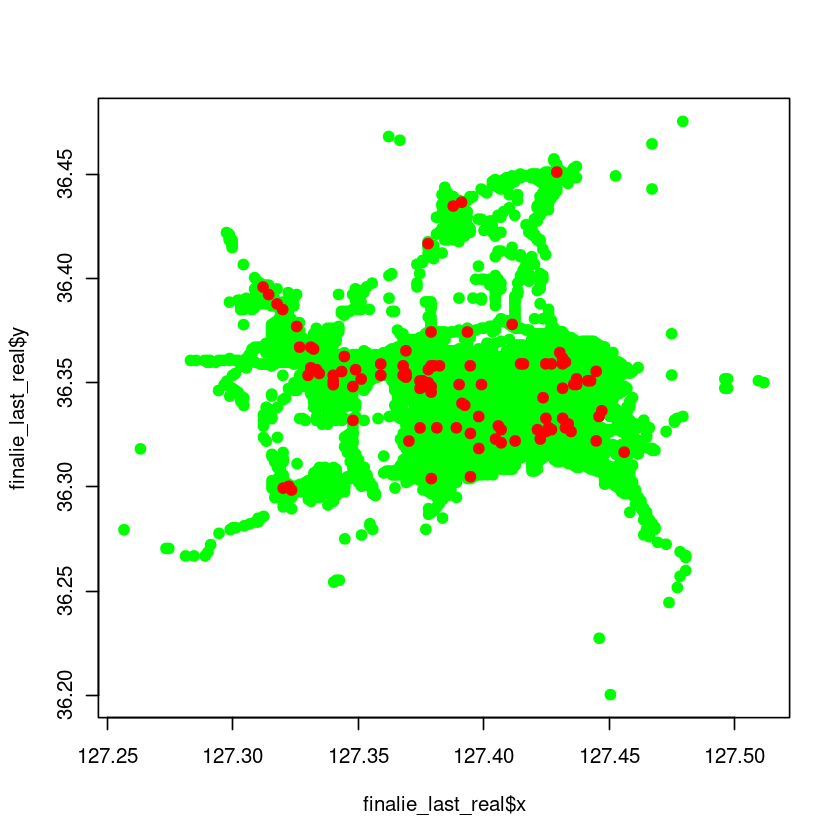

In [28]:
#DGI 지수 구함
#weightsvec->그룹별 가중치 벡터
#residualsmat->잔차 행렬(행:관측치,열:사고유형-연령대 그룹,값:잔차)
#DIratiovec->각 격자가 가지는 사상자 수에 대한 사망자 수 + 중상자 수의 비율
#threshold_quantiles->내림차순으로 정렬한 격자별 DGI 지수의 차이(절댓값)의 하위 n % 백분위수를 threshold로 설정하는데, 여기서 필요한 n 설정   
#함수 리턴 결과가 gid를 포함한 결과이고 싶을 때 gid_include=TRUE 하고 gid 값을 설정해 주면 된다.

dgi<-DGI(weightsvec=c(0.07748547,0.07605981,0.07829668,0.08305307,0.08640373,0.09488054,0.07294598,0.06206129,0.07528174,0.08830434,0.09012788,0.11509948),residualsmat=as.matrix(dplyr::select(finalie_last_2,residuals_under20_car:residuals_60_person),nrow=5138,ncol=12),DIratiovec=finalie_last_real$`중상자이상수`,threshold_quantiles=0.996,gid=finalie_last_2$gid,gid_include = TRUE)
top_100<-dgi$DGI[which(dgi$DGI$true_rank<=100),]

top_100_visu<-top_100%>% 
  left_join(finalie_last_2,by = c("gid","index"))%>%
  left_join(acci_count_filter25,by=c("gid","x","y"))%>%
  dplyr::select(DGI:residuals_60_person,acci_cnt:중상자수)

plot(finalie_last_real$x,finalie_last_real$y,col="green",pch=19)
lines(top_100_visu$x,top_100_visu$y,type="p",pch=19,col="red")

In [29]:
leaflet::leaflet()%>%
  addTiles()%>%
  setView(lng = 127.4,lat = 36.35,zoom=11)%>%
  addMarkers(lng=top_100_visu$x,lat=top_100_visu$y,popup = paste0("DGI: ",round(top_100_visu$DGI,3),"\n 대전 교통사고 위험지역 ",top_100_visu$true_rank,"위"))

#ggplot()+geom_point(data = finalie_last_2,aes(x=x,y=y),colour="blue")+geom_point(data=top_100_visu,aes(x=x,y=y,size=DGI,fill=DGI),colour="red",shape=21,alpha=0.8)+scale_fill_gradient(low="yellow",high="tomato2")

HTML widgets cannot be represented in plain text (need html)

In [30]:
write.csv(top_100_visu, "top_100_visu.csv", row.names = FALSE)

In [59]:
dim(top_100_visu)
top_100_visu %>% head(3)

[1] 100  67

,DGI,DI_ratio,index,gid,difference,false_rank,true_rank,x,y,중상자이상수,⋯,차대사람..60대.이상,차대차..20대,차대차..20대.미만,차대차..30대,차대차..40대,차대차..50대,차대차..60대.이상,사망자수,경상자수,중상자수
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.776024,4,3634,다바882173,0.0000000,1,1,127.3690,36.35349,4,⋯,0,11,1,8,4,17,6,0,7,4
2,1.648503,6,397,다바888170,-0.1275206,2,2,127.3757,36.35079,6,⋯,2,2,0,0,1,1,2,0,7,6
3,1.435875,3,1020,다바931161,-0.2126279,3,3,127.4237,36.34272,3,⋯,3,3,0,1,9,9,6,0,15,3


# <font color=blue>최종 위험 지역 도출</font>

In [26]:
# gid 격자의 시군구 정보 추가
top_100_visu <- read.csv('top_100_visu.csv')
accident_list <- read.csv('1.대전광역시_교통사고내역(2017~2019).csv')
gid_df <- accident_list[, c('시군구', 'gid')]

final_df <- top_100_visu %>% semi_join(accident_list, by='gid') # 기존 데이터와 병합
dim(final_df)
final_df %>% head(3)

[1] 100  67

,DGI,DI_ratio,index,gid,difference,false_rank,true_rank,x,y,중상자이상수,⋯,차대사람..60대.이상,차대차..20대,차대차..20대.미만,차대차..30대,차대차..40대,차대차..50대,차대차..60대.이상,사망자수,경상자수,중상자수
,<dbl>,<int>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1.776024,4,3634,다바882173,0.0000000,1,1,127.3690,36.35349,4,⋯,0,11,1,8,4,17,6,0,7,4
2,1.648503,6,397,다바888170,-0.1275206,2,2,127.3757,36.35079,6,⋯,2,2,0,0,1,1,2,0,7,6
3,1.435875,3,1020,다바931161,-0.2126279,3,3,127.4237,36.34272,3,⋯,3,3,0,1,9,9,6,0,15,3


In [139]:
head(final_df[, c('y', 'x')])

,y,x
,<dbl>,<dbl>
1,36.35349,127.3690
2,36.35079,127.3757
3,36.34272,127.4237
4,36.35259,127.3690
5,36.34806,127.3479
6,36.29844,127.3235


In [136]:
# 각 격자의 위도, 경도 좌표를 바탕으로 세부적인 주소를 네이버 지도를 통해서 획득
gid_location = c('대전광역시 서구 갈마동 706', '대전광역시 서구 둔산동 1077', '대전광역시 동구 삼성동 458', 
                 '대전광역시 서구 갈마동 307-1', '대전광역시 유성구 봉명동 1063', '대전광역시 서구 관저동 616-10', 
                 '대전광역시 서구 탄방동 544', '대전광역시 유성구 원내동 360-27', '대전광역시 유성구 화암동 216-5', 
                 '대전광역시 서구 둔산동 959-1', '대전광역시 동구 대동 400-1', '대전광역시 대덕구 중리동 450', 
                 '대전광역시 서구 둔산동 911', '대전광역시 서구 둔산동 1204', '대전광역시 동구 판암동 467-13', 
                 '대전광역시 중구 태평동 520-1', '대전광역시 서구 갈마동 1459-1', '대전광역시 유성구 반석동 685', 
                 '대전광역시 동구 가양동 424-6', '대전광역시 유성구 도룡동 8-59', '대전광역시 중구 선화동 383', 
                 '대전광역시 중구 은행동 154', '대전광역시 중구 오류동 165-15', '대전광역시 유성구 봉산동 1002', 
                 '대전광역시 유성구 봉명동 1058', '대전광역시 유성구 장대동 117-13', '대전광역시 중구 대흥동 233-2', 
                 '대전광역시 서구 둔산동 2166', '대전광역시 유성구 구암동 527-61', '대전광역시 중구 대흥동 201', 
                 '대전광역시 서구 둔산동 1162', '대전광역시 동구 신흥동 6', '대전광역시 서구 갈마동 705', 
                 '대전광역시 서구 월평동 282-1', '대전광역시 중구 오류동 196-1', '대전광역시 유성구 지족동 1005', 
                 '대전광역시 유성구 구암동 641', '대전광역시 서구 변동 12-10', '대전광역시 동구 홍도동 838', 
                 '대전광역시 대덕구 중리동 469', '대전광역시 유성구 원내동 711', '대전광역시 서구 월평동 1636', 
                 '대전광역시 유성고 도룡동 465-27', '대전광역시 서구 갈마동 986', '대전광역시 유성구 봉명동 539-1', 
                 '대전광역시 대덕구 읍내동 505-23', '대전광역시 서구 월평동 184-2', '대전광역시 서구 갈마동 1459', 
                 '대전광역시 동구 중동 75-8', '대전광역시 중구 대흥동 508-88', '대전광역시 중구 문화동 1-29', 
                 '대전광역시 유성구 노은동 132', '대전광역시 서구 둔산동 948', '대전광역시 서구 갈마동 685', 
                 '대전광역시 서구 만년동 682', '대전광역시 동구 정동 45-1', '대전광역시 서구 도안동 1493-1', 
                 '대전광역시 서구 가장동 202', '대전광역시 서구 탄방동 544', '대전광역시 대덕구 오정동 43', 
                 '대전광역시 동구 용전동 220', '대전광역시 서구 변동 292', '대전광역시 유성구 노은동 61-13', 
                 '대전광역시 서구 둔산동 1546', '대전광역시 서구 월평동 1503-1', '대전광역시 서구 복수동 611', 
                 '대전광역시 유성구 봉명동 574', '대전광역시 유성구 송강동 171-1', '대전광역시 서구 둔산동 1100', 
                 '대전광역시 서구 둔산동 950', '대전광역시 서구 월평동 1528', '대전광역시 동구 용전동 227', 
                 '대전광역시 대덕구 중리동 150-3', '대전광역시 유성구 구암동 593-2', '대전광역시 유성구 봉명동 1058', 
                 '대전광역시 대덕구 오정동 64-18', '대전광역시 동구 가양동 630', '대전광역시 중구 선화동 862-3', 
                 '대전광역시 대덕구 중리동 424', '대전광역시 중구 용두동 115-2', '대전광역시 서구 도마동 227', 
                 '대전광역시 동구 자양동 67-17', '대전광역시 대덕구 비래동 103-4', '대전광역시 동구 인동 352', 
                 '대전광역시 유성구 구암동 95-5', '대전광역시 유성구 장대동 115-1', '대전광역시 동구 용전동 68-2', 
                 '대전광역시 유성구 반석동 685', '대전광역시 중구 용두동 112-10', '대전광역시 동구 원동 60-10', 
                 '대전광역시 중구 산성동 48-4', '대전광역시 유성구 지족동 1005', '대전광역시 중구 태평동 531', 
                 '대전광역시 동구 성남동 509', '대전광역시 유성구 봉명동 563-23', '대전광역시 대덕구 신탄진동 144-1',  
                 '대전광역시 대덕구 중리동 126-4', '대전광역시 중구 유천동 185-3', '대전광역시 유성구 궁동 220-9', '대전광역시 유성구 봉명동 449-4')
length(gid_location)

[1] 100

In [146]:
danger_df <- final_df[, c('x', 'y')]
danger_df$'시설명/주소지' <- gid_location
danger_df$'위험순위' <- c(1:100)
danger_df$'반경범위' <- '100M'
dim(danger_df)
danger_df %>% head()

[1] 100   5

,x,y,시설명/주소지,위험순위,반경범위
,<dbl>,<dbl>,<chr>,<int>,<chr>
1,127.3690,36.35349,대전광역시 서구 갈마동 706,1,100M
2,127.3757,36.35079,대전광역시 서구 둔산동 1077,2,100M
3,127.4237,36.34272,대전광역시 동구 삼성동 458,3,100M
4,127.3690,36.35259,대전광역시 서구 갈마동 307-1,4,100M
5,127.3479,36.34806,대전광역시 유성구 봉명동 1063,5,100M
6,127.3235,36.29844,대전광역시 서구 관저동 616-10,6,100M


In [150]:
danger_df <- danger_df[, c('위험순위', '시설명/주소지', 'x', 'y', '반경범위')]
dim(danger_df)
danger_df %>% head()

[1] 100   5

,위험순위,시설명/주소지,x,y,반경범위
,<int>,<chr>,<dbl>,<dbl>,<chr>
1,1,대전광역시 서구 갈마동 706,127.3690,36.35349,100M
2,2,대전광역시 서구 둔산동 1077,127.3757,36.35079,100M
3,3,대전광역시 동구 삼성동 458,127.4237,36.34272,100M
4,4,대전광역시 서구 갈마동 307-1,127.3690,36.35259,100M
5,5,대전광역시 유성구 봉명동 1063,127.3479,36.34806,100M
6,6,대전광역시 서구 관저동 616-10,127.3235,36.29844,100M


In [151]:
write.csv(danger_df, "danger_top_100.csv", row.names = F)